## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import statsmodels.api as sm
import pickle
import gc 
from sklearn import svm
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

## Exploratory data analysis

In [3]:
df_raw = pd.read_csv('creditcard.csv')
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#observe the different feature type present in the data

df_raw.shape

(284807, 31)

In [5]:
df_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Checking for null or missing values and checking Data type
df_raw.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Plotting the Distribution of a Variable

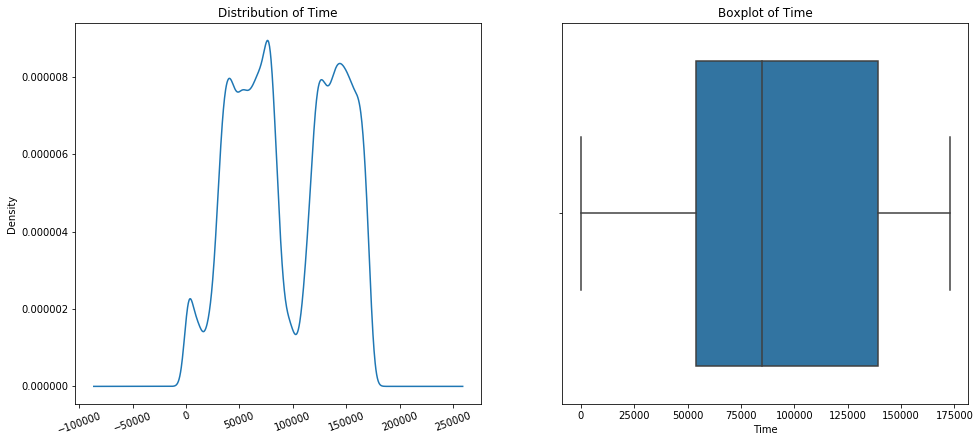

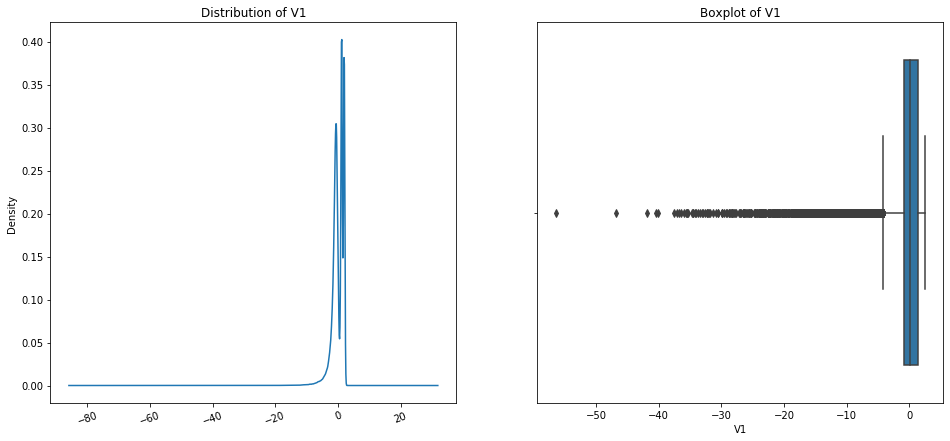

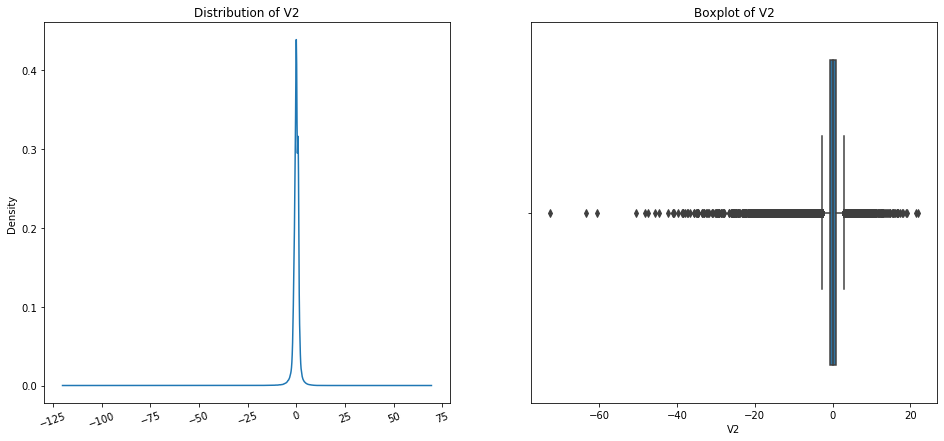

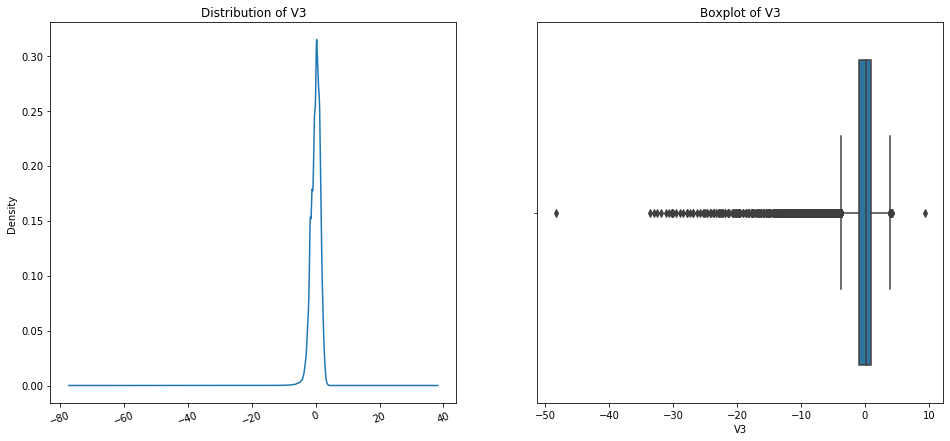

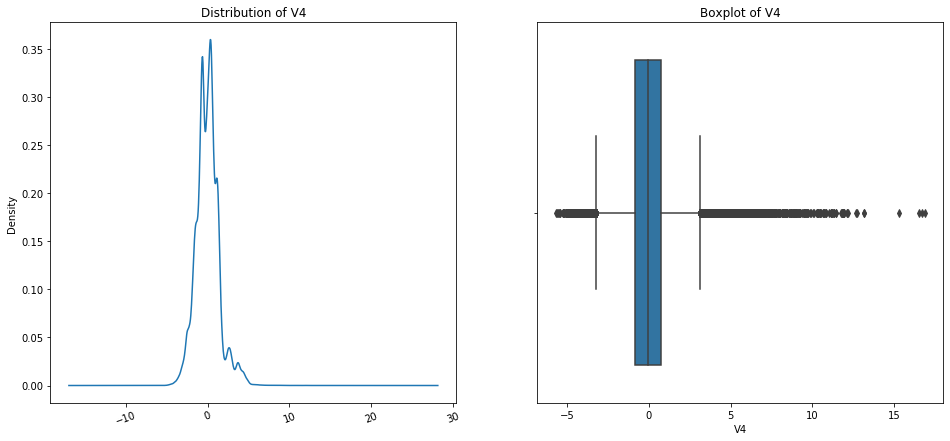

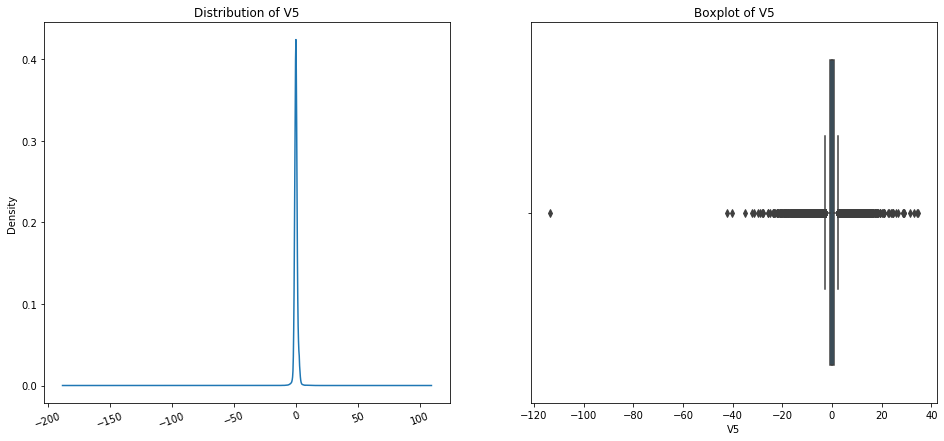

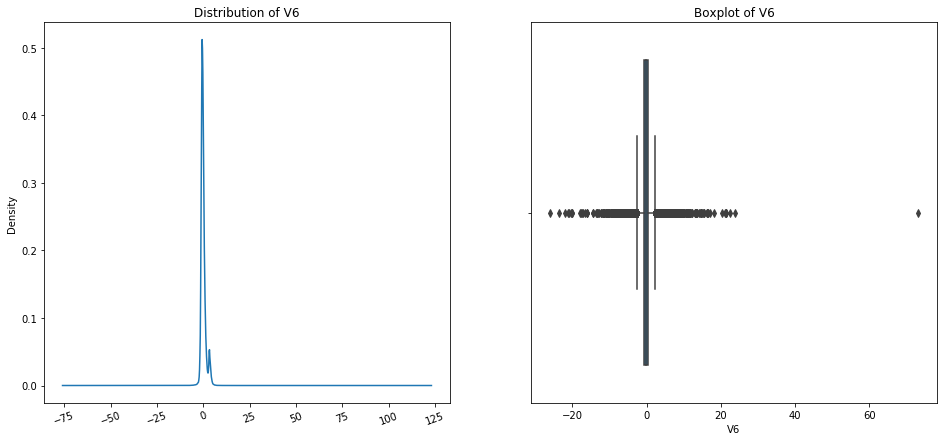

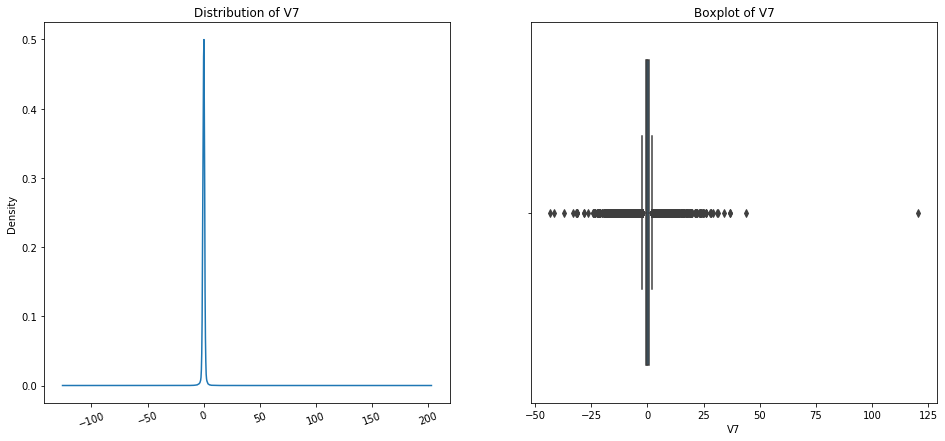

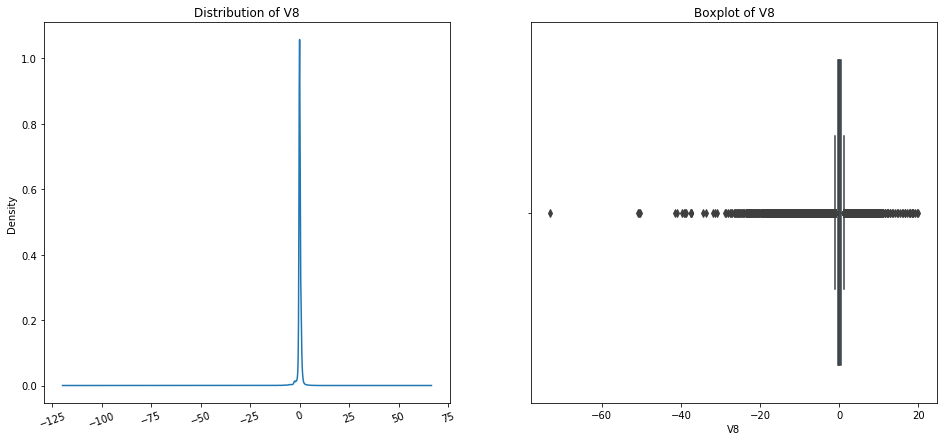

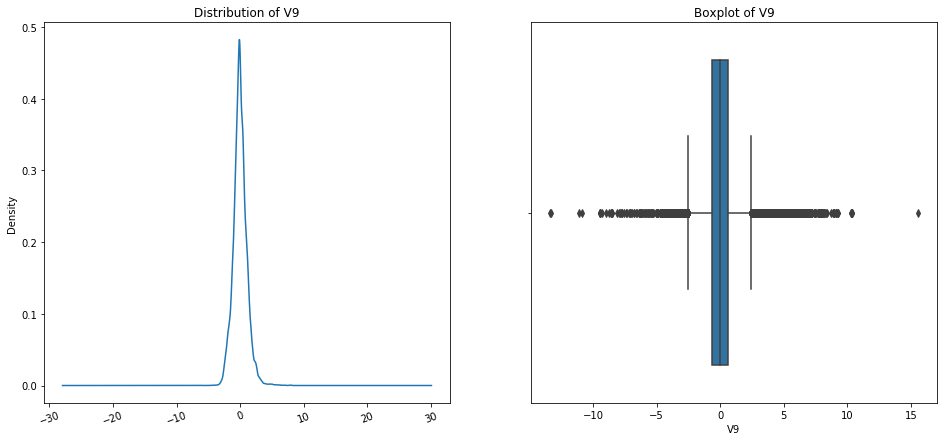

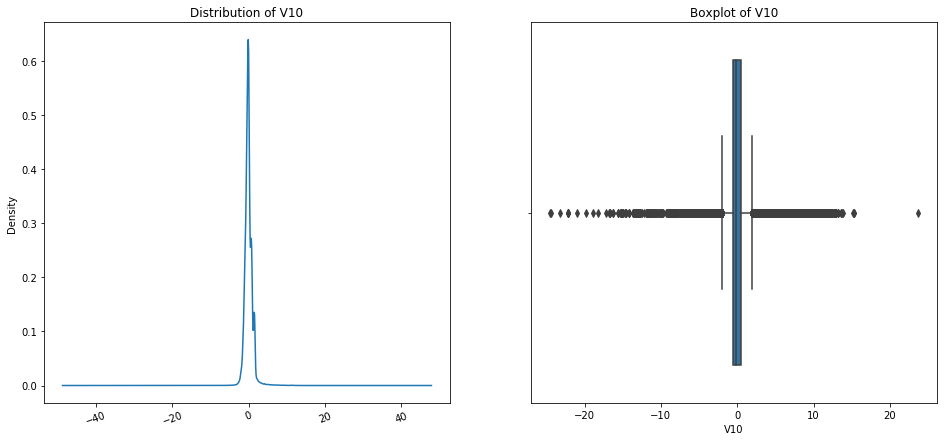

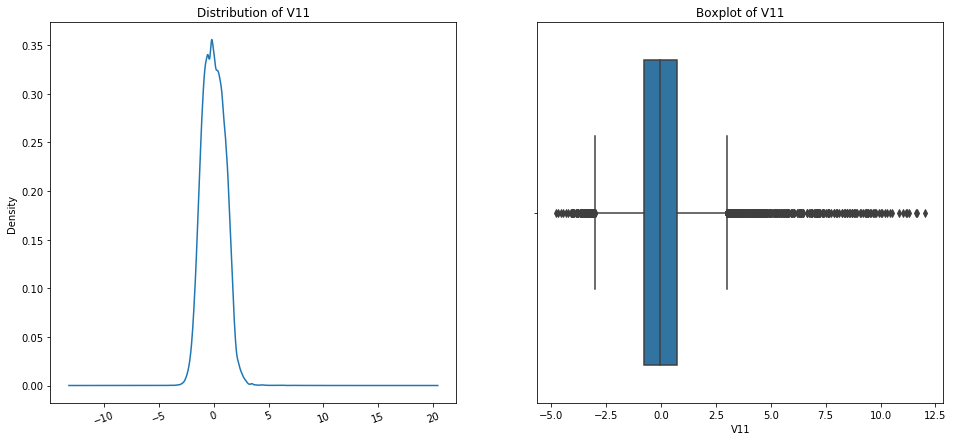

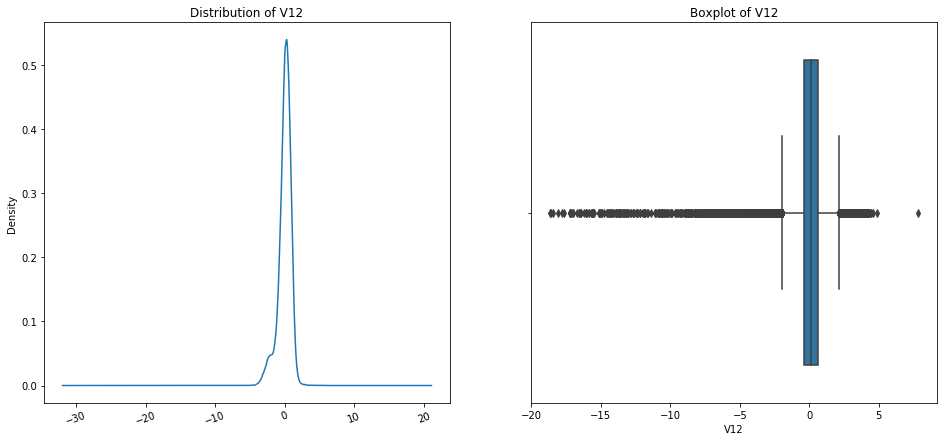

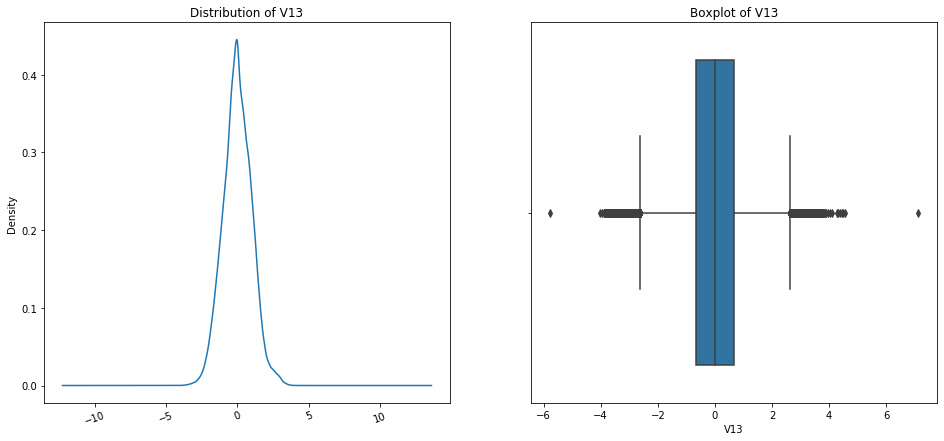

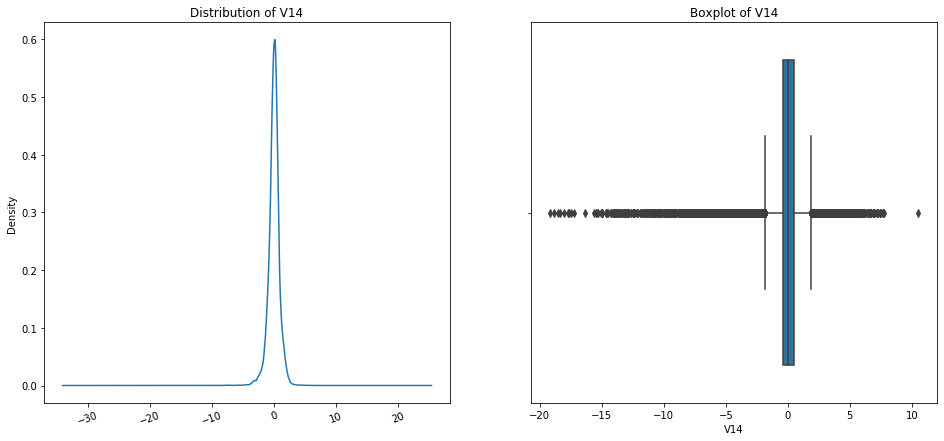

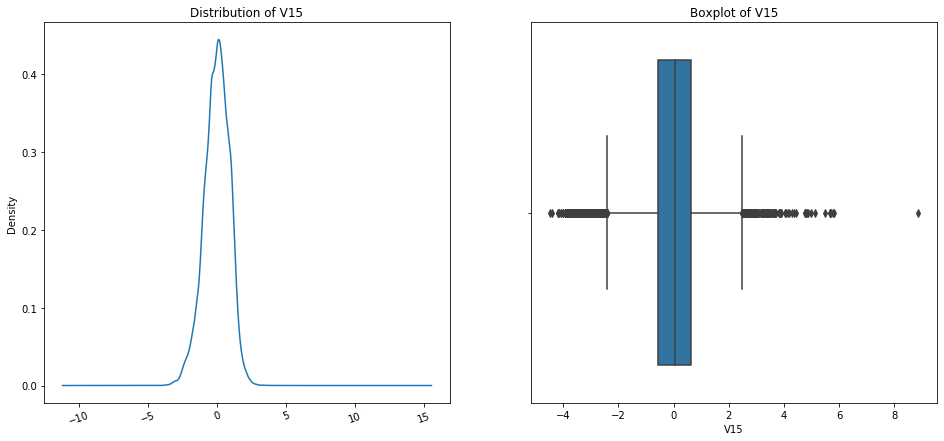

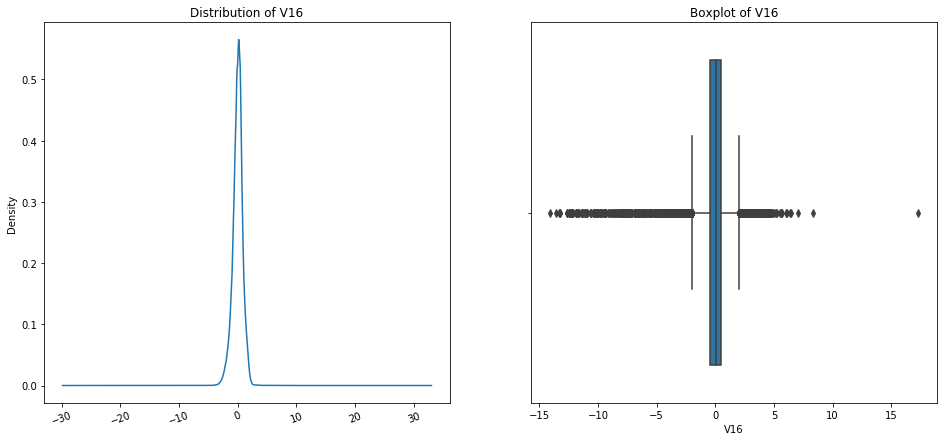

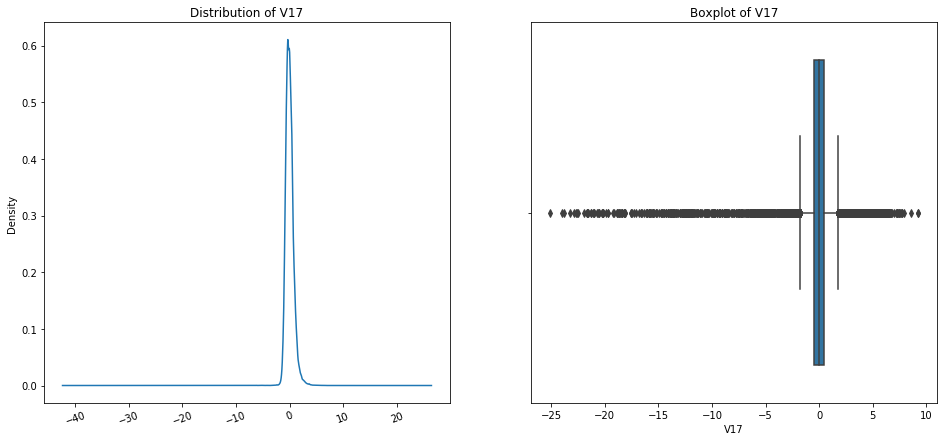

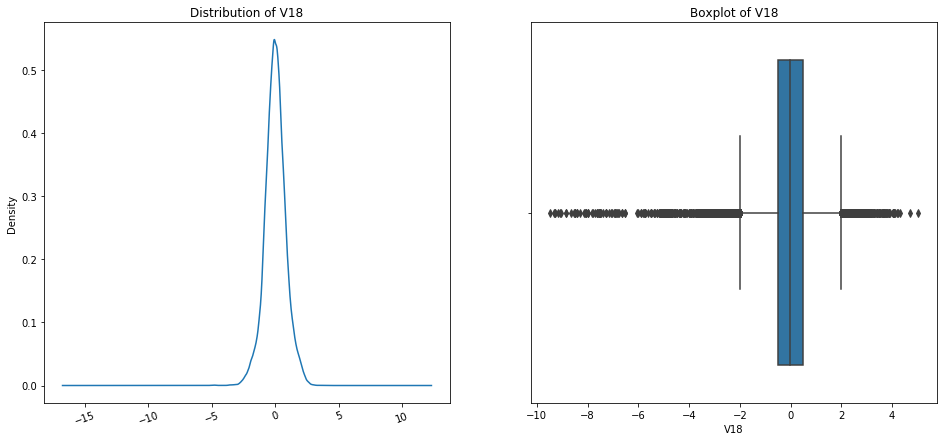

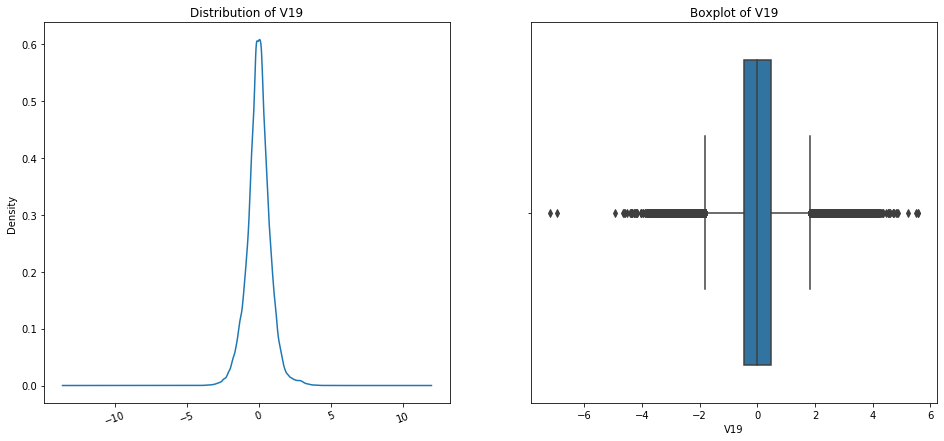

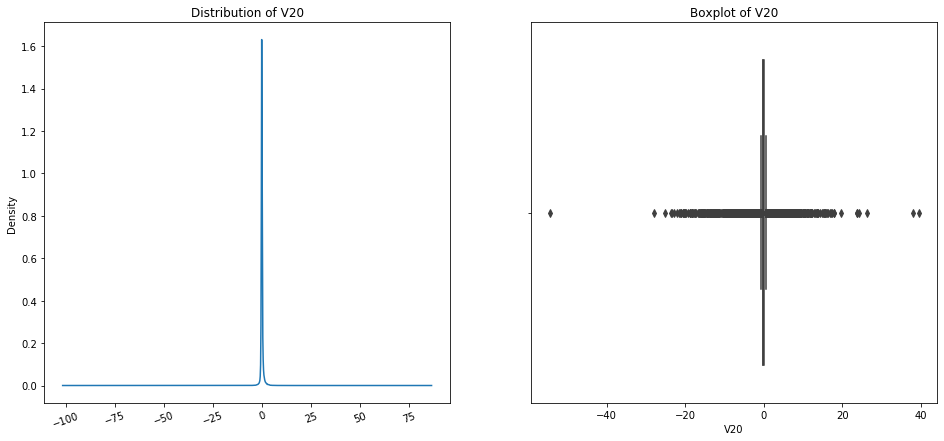

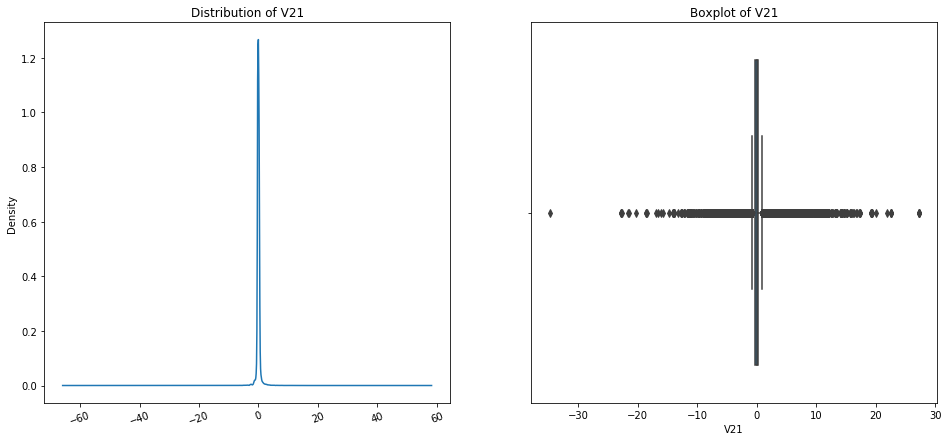

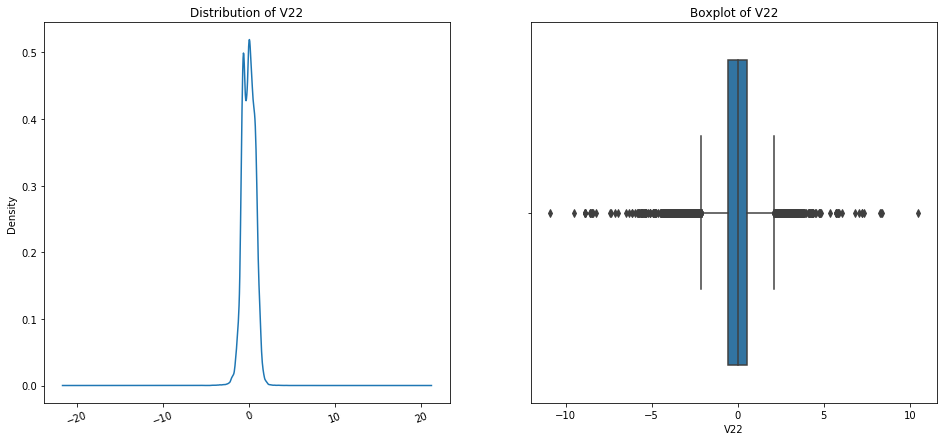

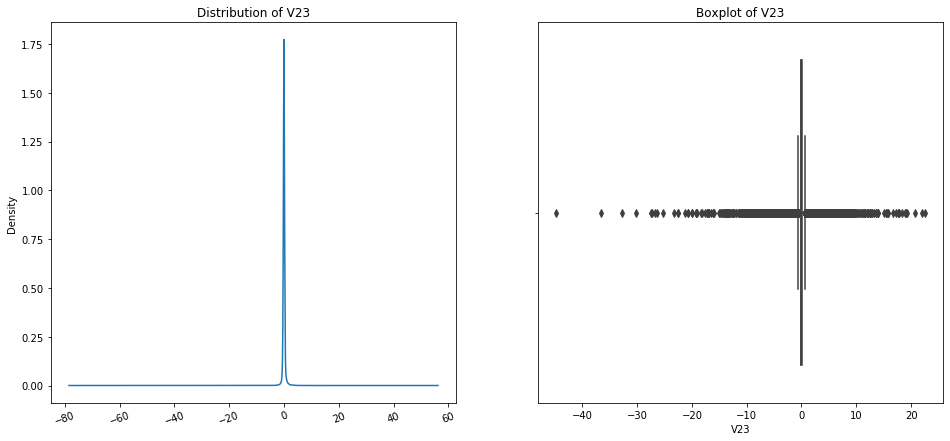

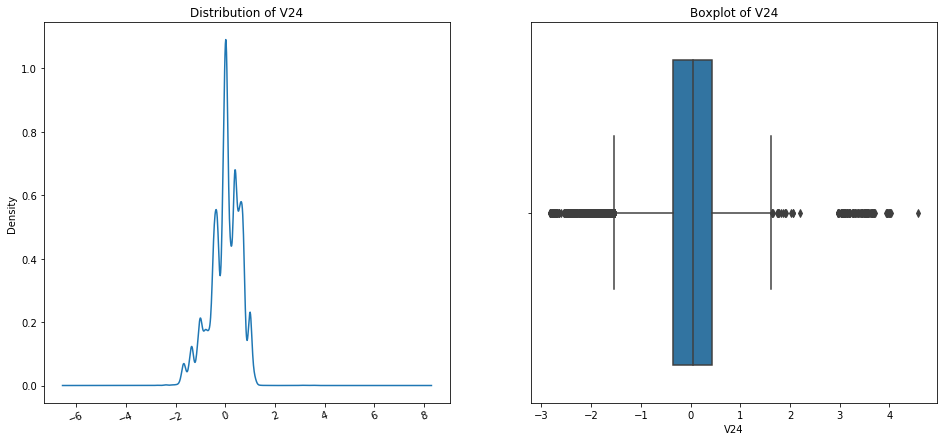

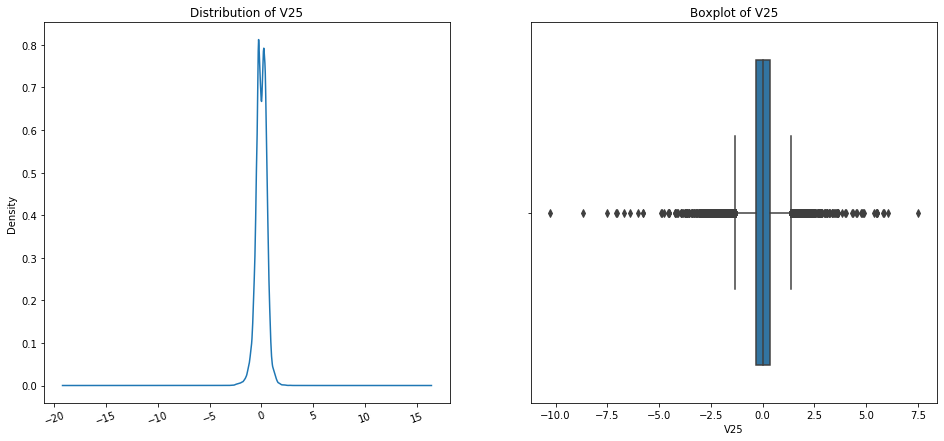

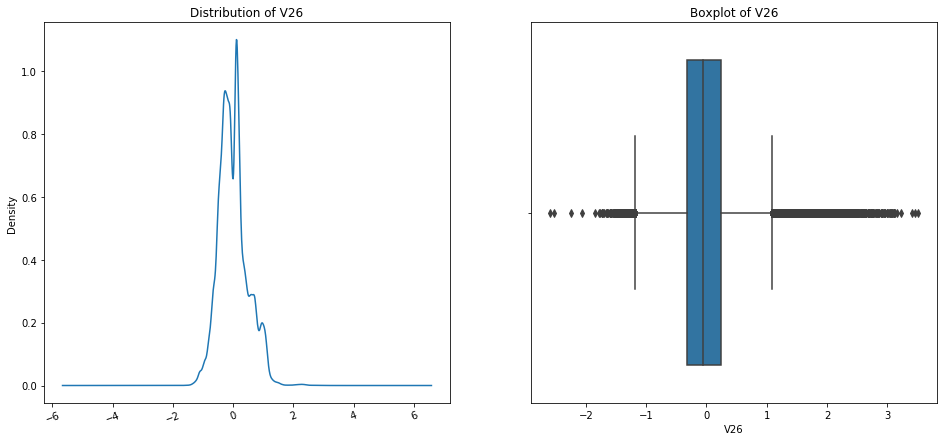

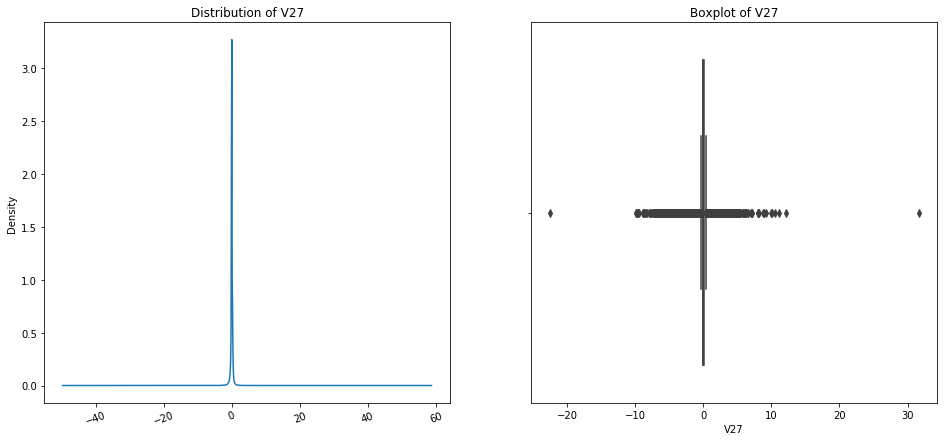

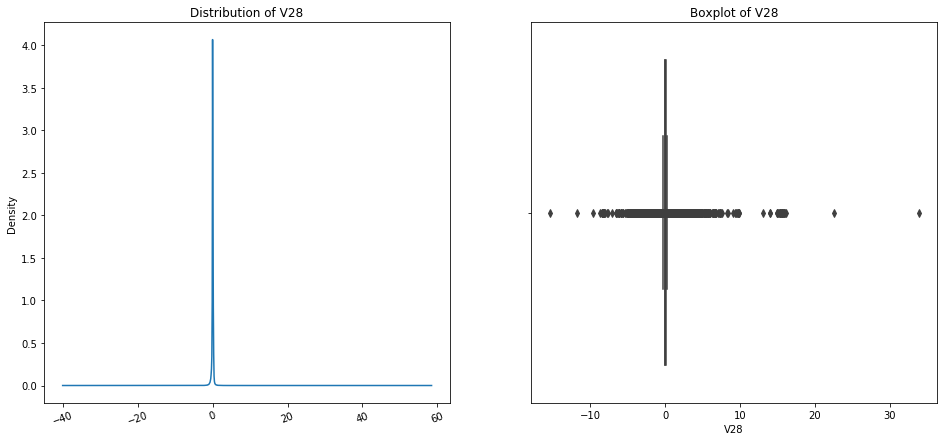

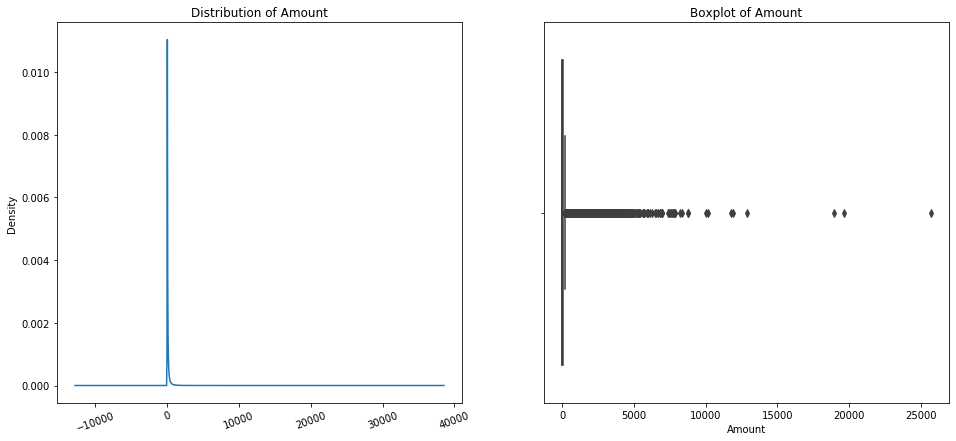

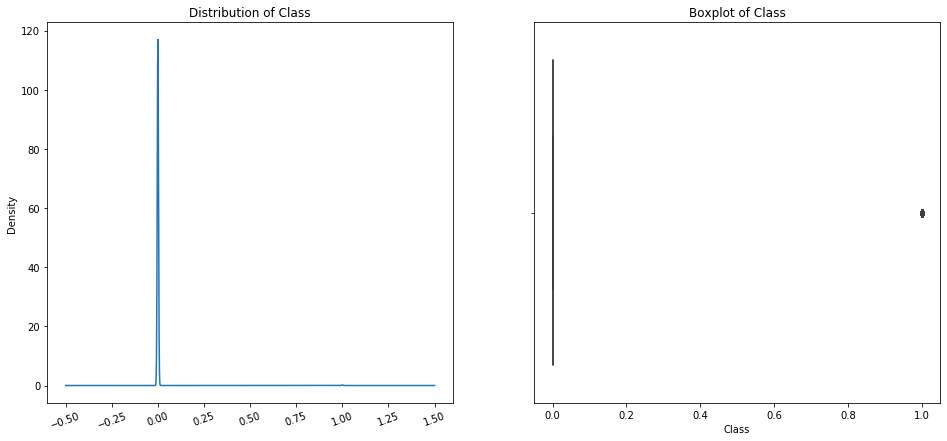

In [16]:
for column in df_raw:
    plt.figure(figsize=(16, 7))
    
    plt.subplot(1, 2, 1)
    df_raw[column].plot.kde()
    plt.title('Distribution of' +" " + column)
    plt.xticks(rotation=20)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=column, data=df_raw)
    plt.title('Boxplot of' +" " + column)
    plt.show()

Here we will observe the distribution of our classes

In [7]:
classes=df_raw['Class'].value_counts()
normal_share=classes[0]/df_raw['Class'].count()*100
fraud_share=classes[1]/df_raw['Class'].count()*100

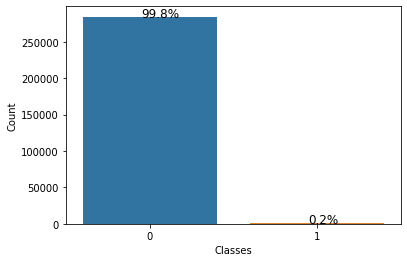

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

ax = sns.countplot("Class", data=df_raw)
plt.ylabel("Count")
plt.xlabel('Classes')
without_hue(ax, df_raw['Class'])


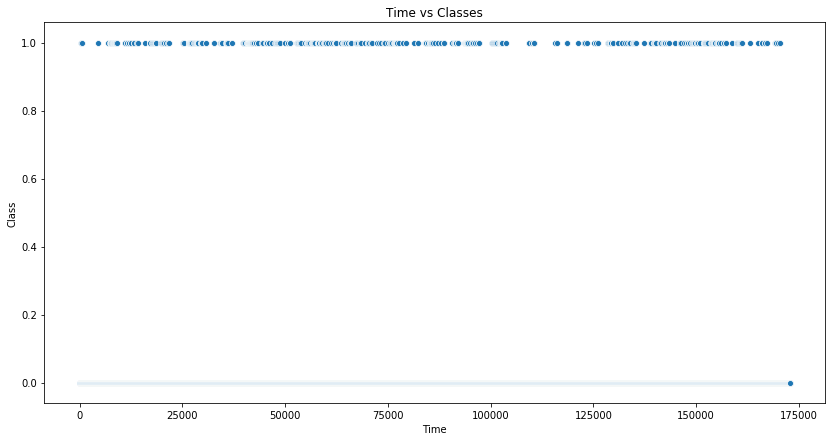

In [9]:
# Create a scatter plot to observe the distribution of classes with time


plt.figure(figsize = (14,7))
sns.scatterplot(x="Time", y="Class", data=df_raw, ci=60)
plt.title('Time vs Classes')
plt.show()

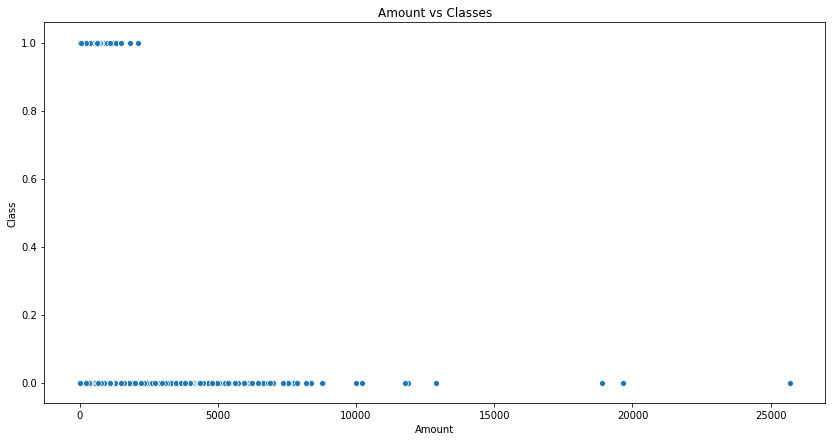

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize = (14,7))
sns.scatterplot(x="Amount", y="Class", data=df_raw, ci=60)
plt.title('Amount vs Classes')
plt.show()

In [11]:
# Drop unnecessary columns

# From above analysis most of the variables are following Gaussian distribution. 
#Time variable does not seem to add much value in explaining the classes and hence we will drop it, also this is not a time series data.

df_raw = df_raw.drop(['Time'], axis = 1)




In [12]:
df_raw.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Splitting the data into train & test data

In [13]:
y = df_raw['Class'] #class variable
X = df_raw.drop(['Class'], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=99, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [15]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

pt = preprocessing.PowerTransformer(copy=False)
trx = pt.fit_transform(X)

cols = list(X.columns.values)
trx_df = pd.DataFrame(data=trx, columns=cols)


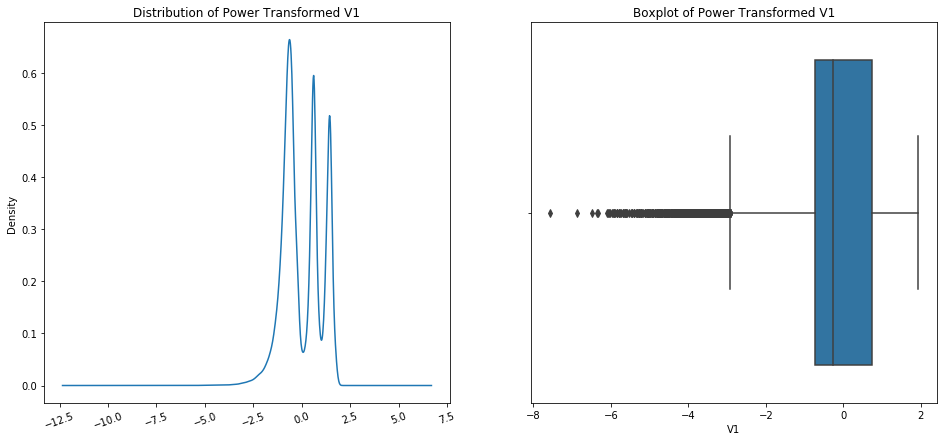

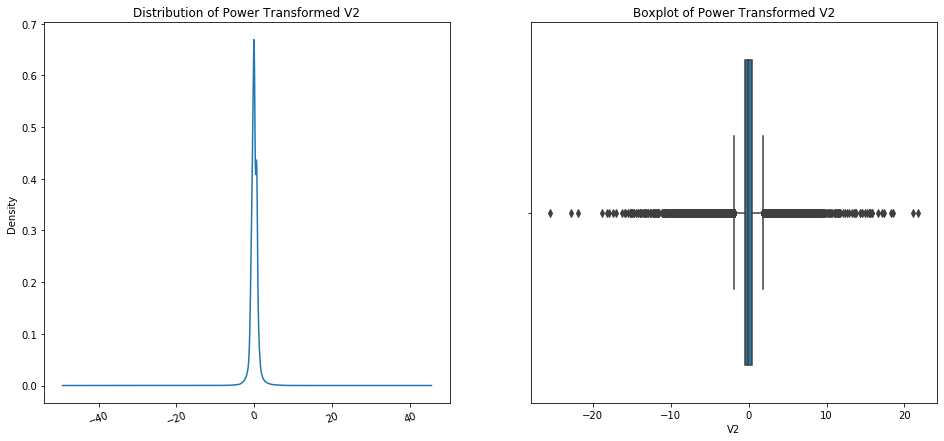

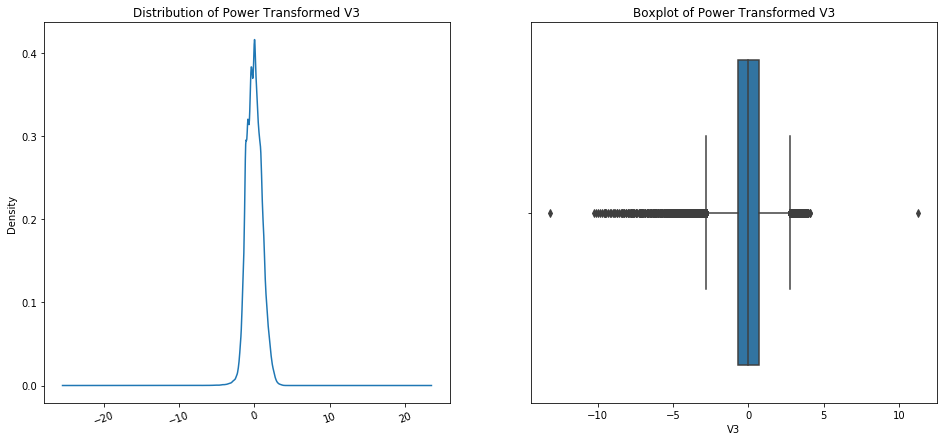

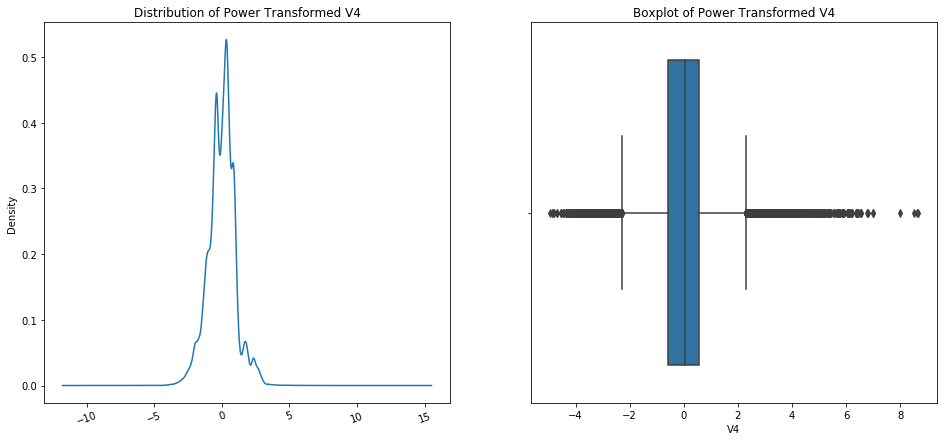

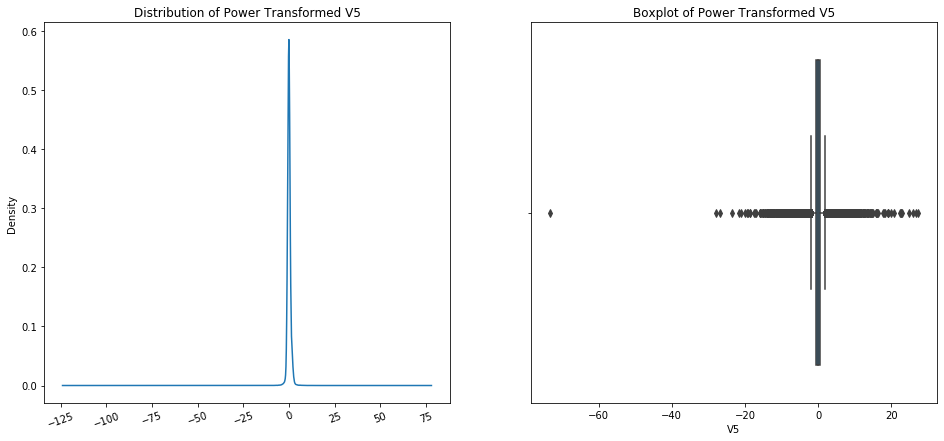

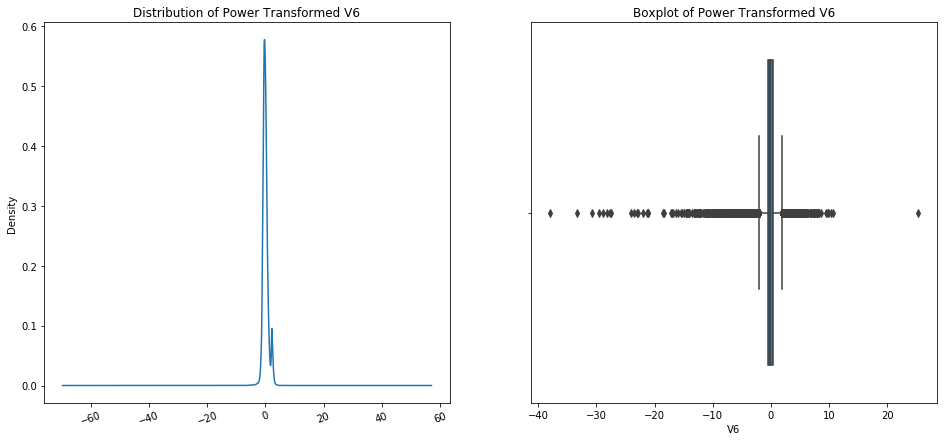

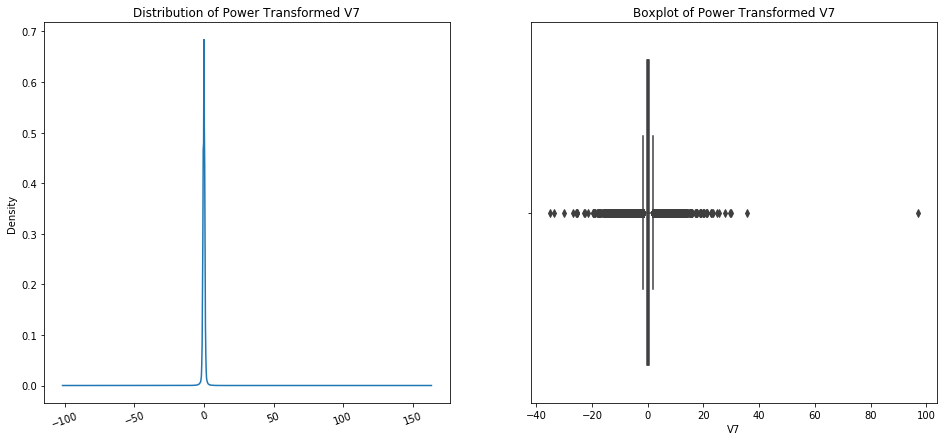

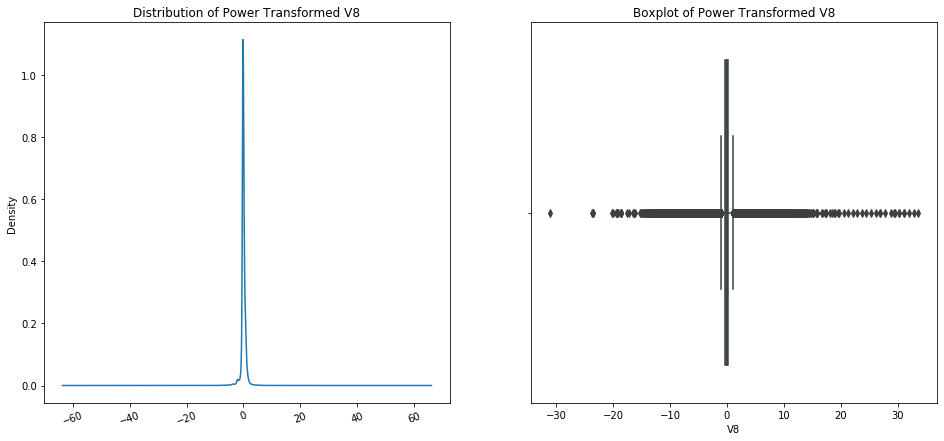

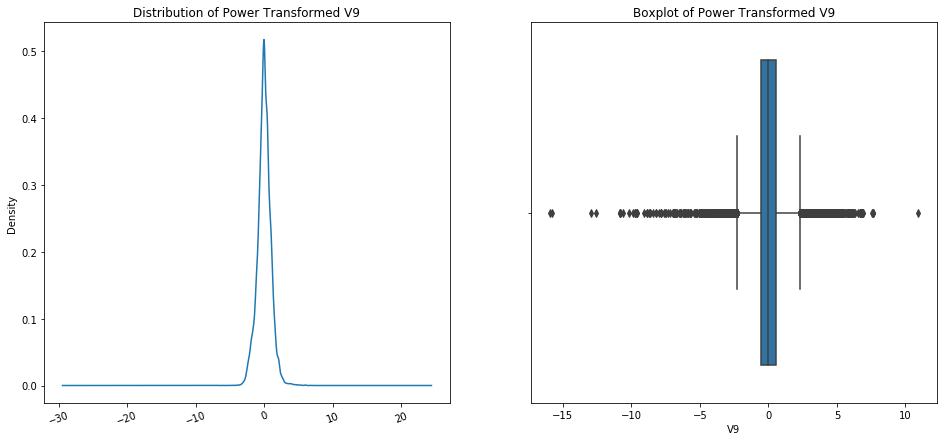

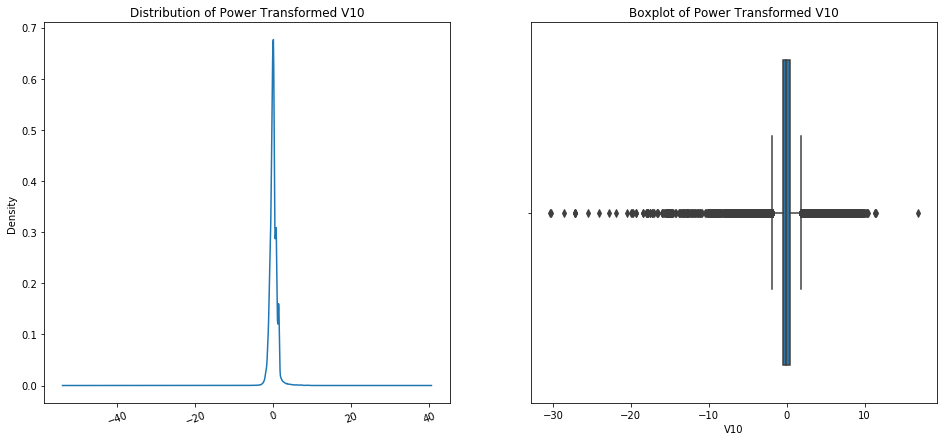

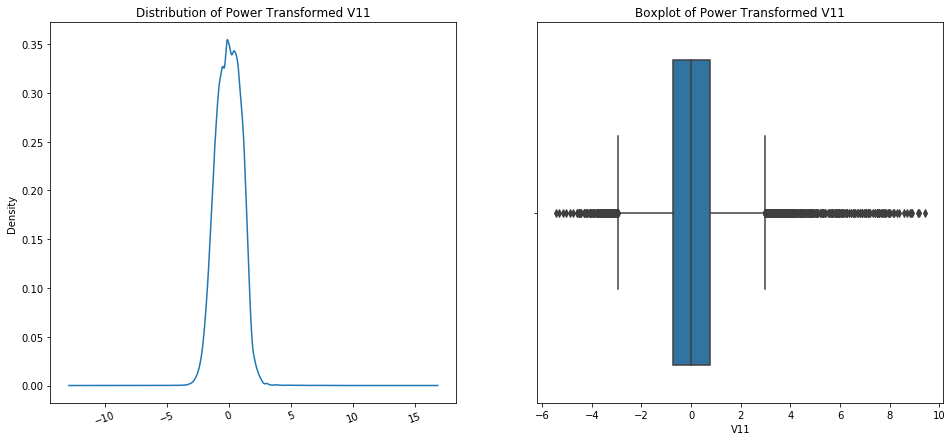

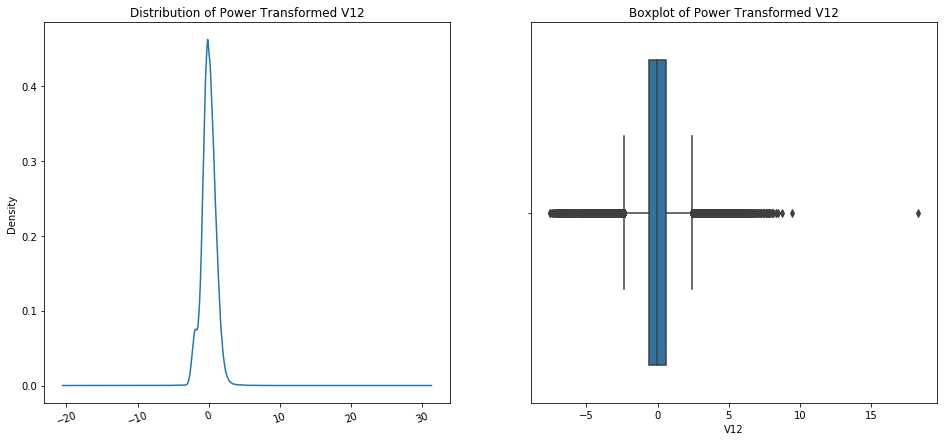

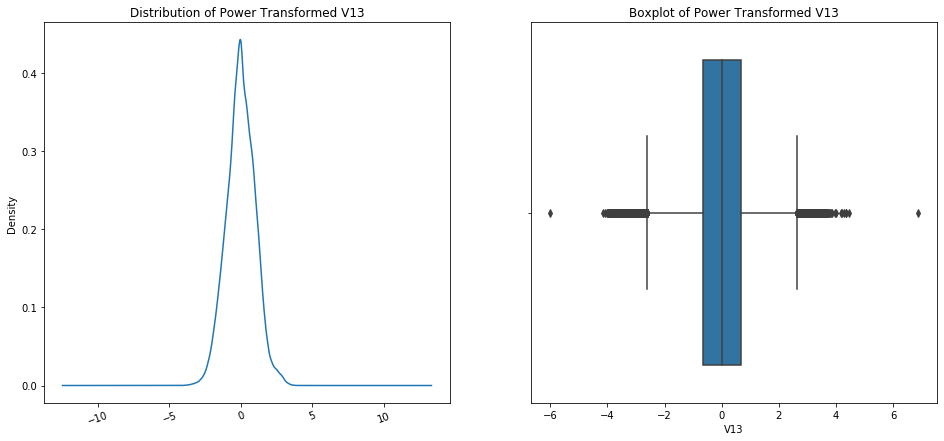

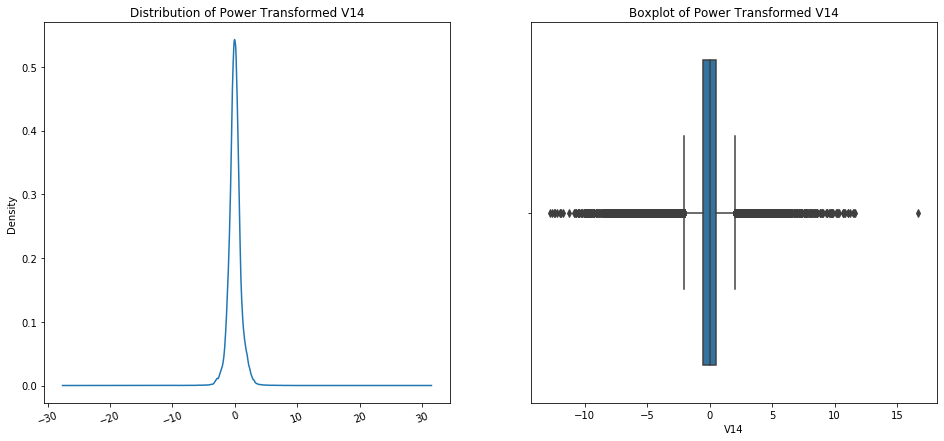

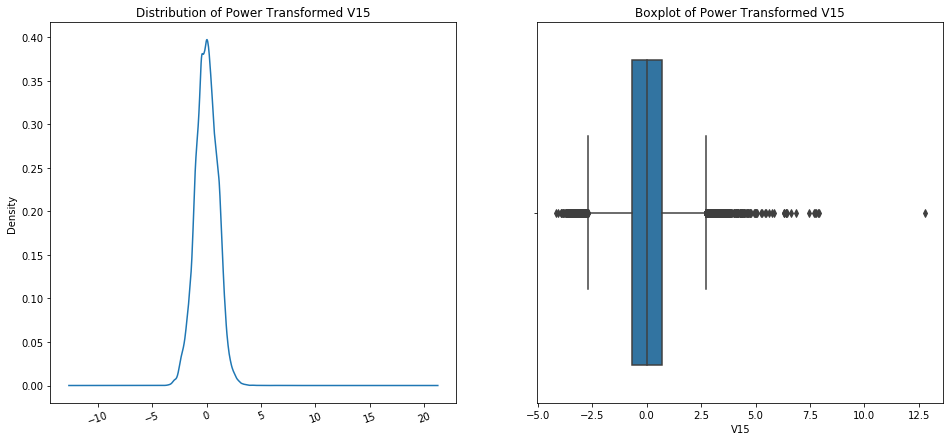

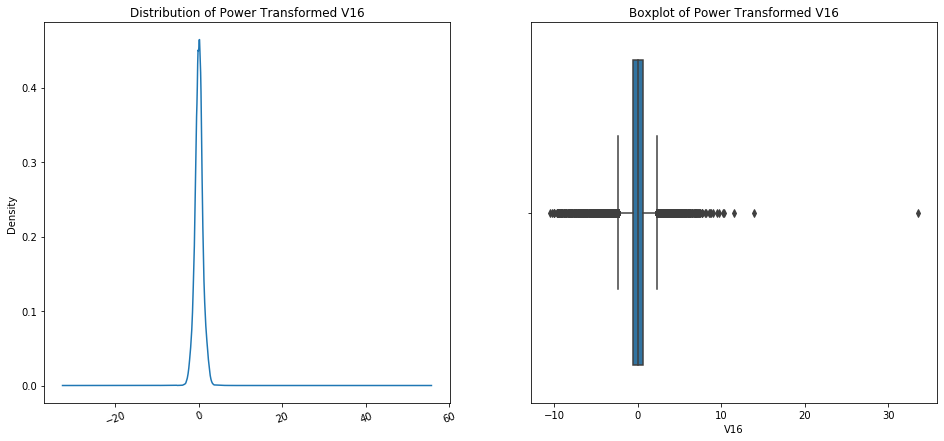

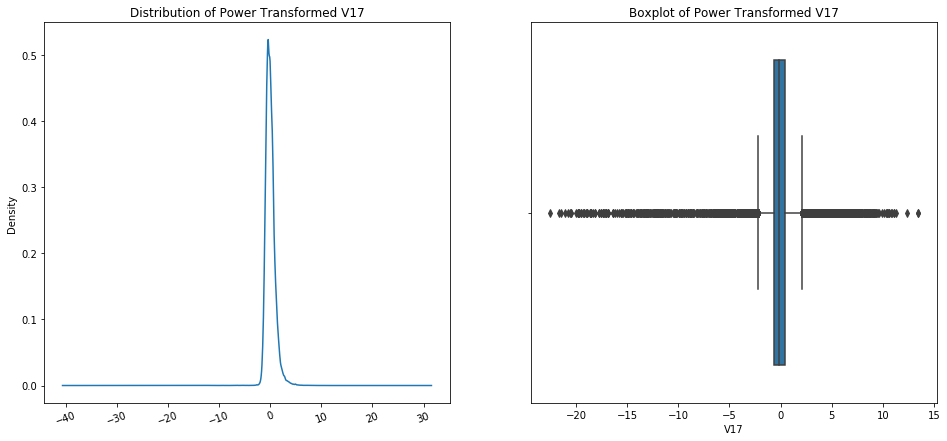

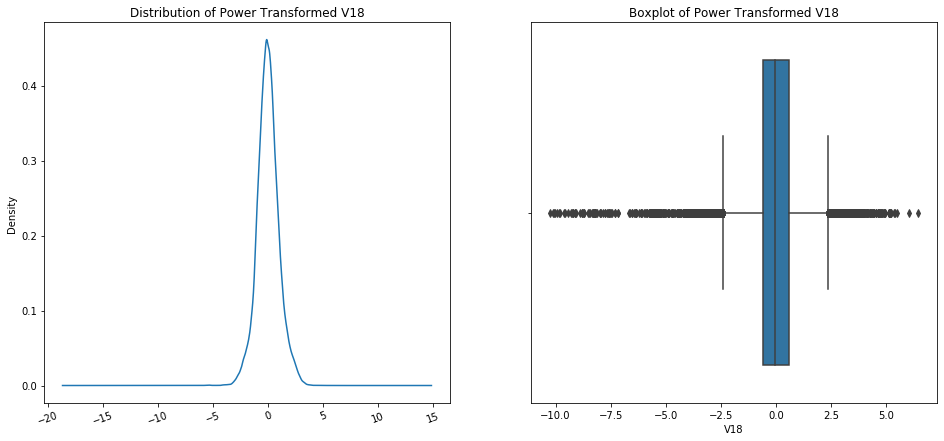

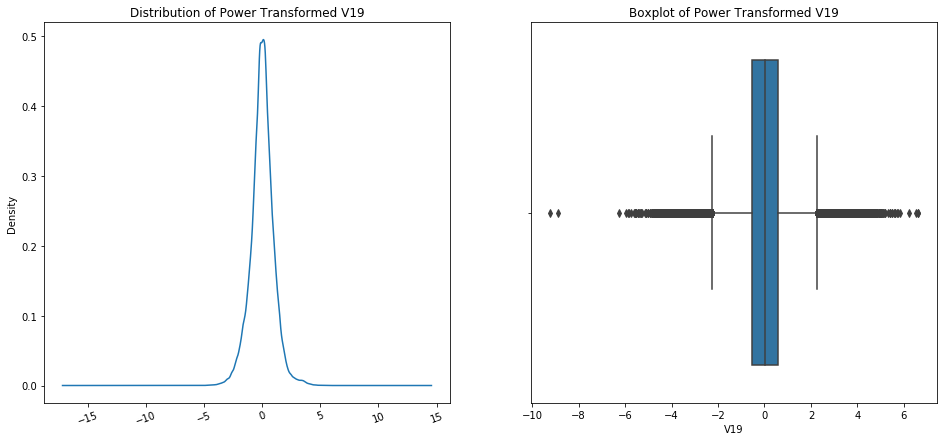

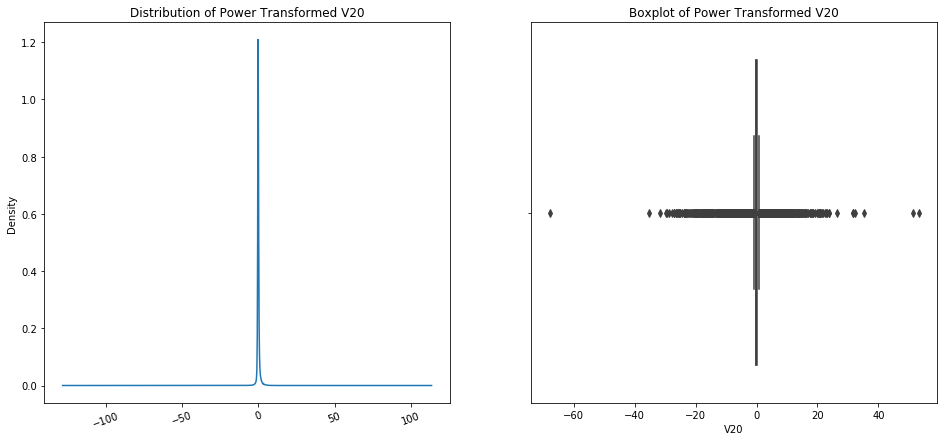

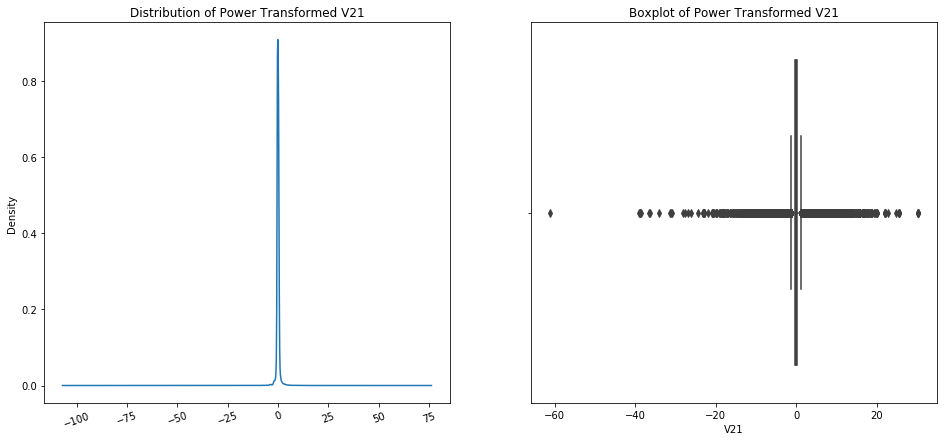

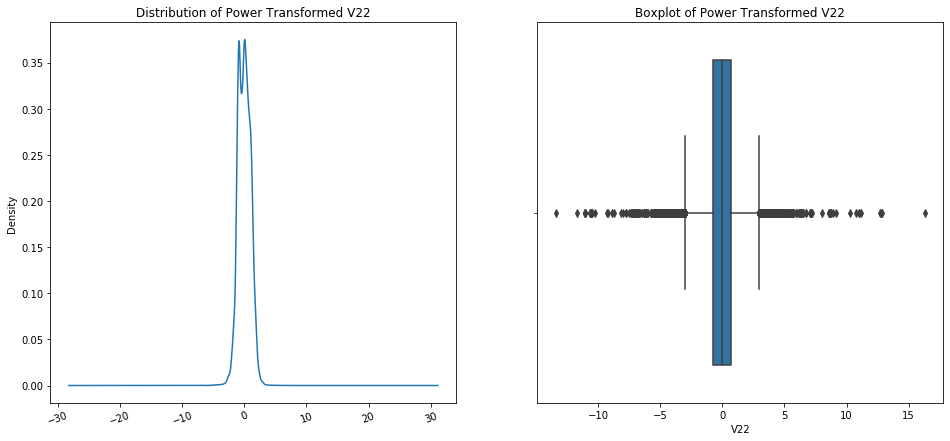

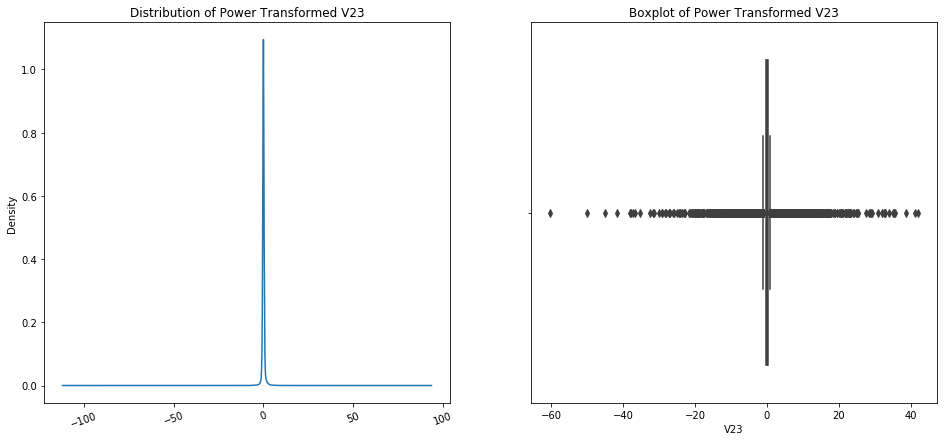

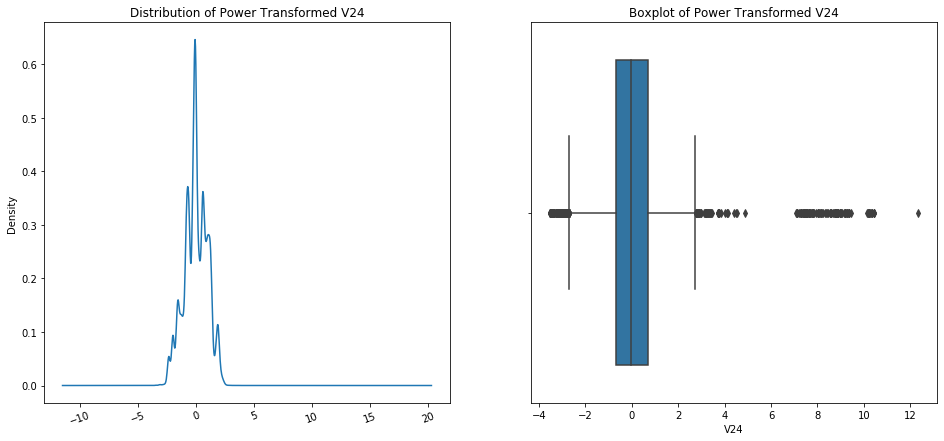

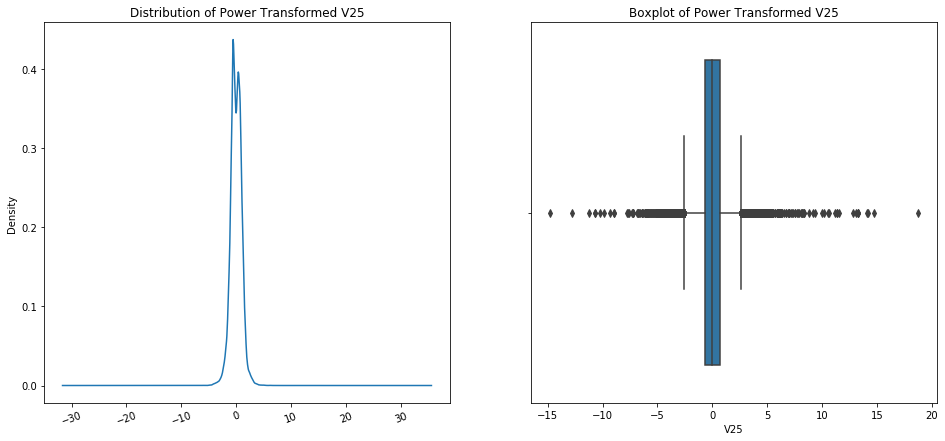

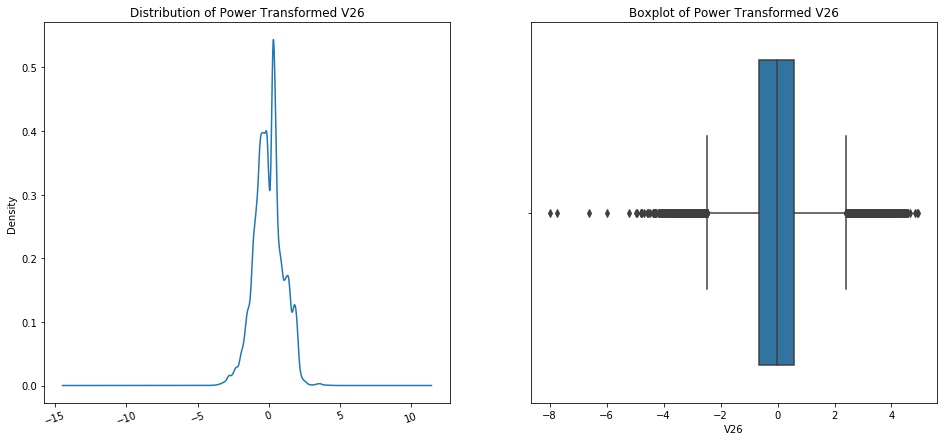

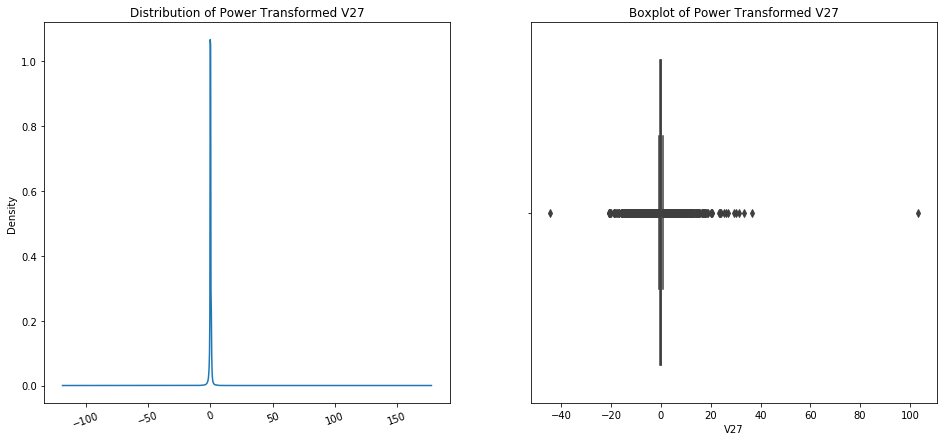

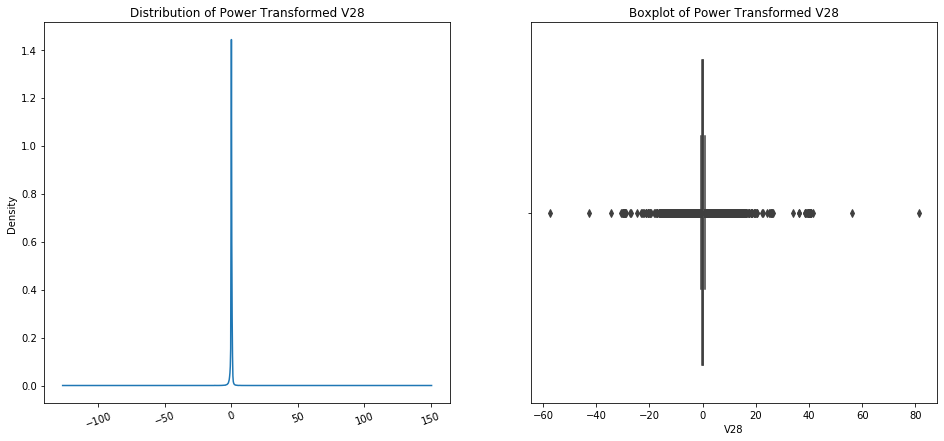

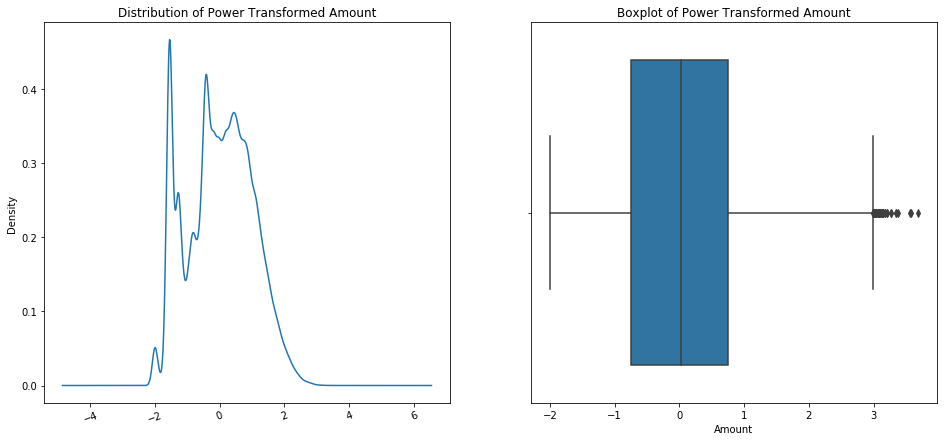

In [73]:
# plot the histogram of a variable from the dataset again to see the result 
for column in trx_df:
    plt.figure(figsize=(16, 7))
    
    plt.subplot(1, 2, 1)
    trx_df[column].plot.kde()
    plt.title('Distribution of Power Transformed' +" " + column)
    plt.xticks(rotation=20)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=column, data=trx_df)
    plt.title('Boxplot of Power Transformed' +" " + column)
    plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### Model 1 - Logistic Regression with Data Imbalance

In [17]:
# Splitting dataset into test and train sets in 70:30 ratio after applying Power Transform

kfold = 5
skf = StratifiedShuffleSplit(n_splits=kfold, test_size=0.3, random_state=99)
for train_index, test_index in skf.split(trx, y):
        X_train, X_test = trx[train_index], trx[test_index]
        y_train, y_test = y[train_index], y[test_index]

In [18]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model to train data
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Predict on test data
y_predicted_lr = model_lr.predict(X_test)

In [20]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_lr))
print('Classification report:\n', classification_report(y_test, y_predicted_lr))
print("Logistic Regression - Imbalanced Data Accuracy: ",accuracy_score(y_test,y_predicted_lr))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_lr))

Confusion matrix:
 [[85281    14]
 [   45   103]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.70      0.78       148

    accuracy                           1.00     85443
   macro avg       0.94      0.85      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression - Imbalanced Data Accuracy:  0.9993094811745842
ROC AUC :  0.8478909048564363


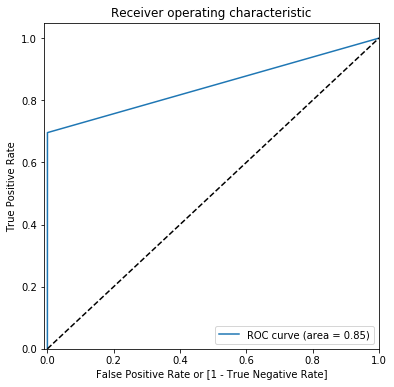

(array([0.00000000e+00, 1.64136233e-04, 1.00000000e+00]),
 array([0.        , 0.69594595, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [21]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_test, y_predicted_lr)

### Hyper Parameter Tuning - Logistic Regression with Data Imbalance

In [22]:
from imblearn.metrics import sensitivity_specificity_support

# Number of folds

n_folds = 5
# parameters 
params ={'C': [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2'], 'solver':['liblinear']}

lrh = LogisticRegression()

model_lrh = GridSearchCV(estimator=lrh, cv=n_folds, param_grid=params, scoring='roc_auc', verbose=1)

In [23]:
# Fitting the model

model_lrh.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

In [24]:
print("Best hyperparameters: ", model_lrh.best_params_)
print("Best AUC for abover Hyperparameters: ", model_lrh.best_score_)

Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC for abover Hyperparameters:  0.975962239483272


In [25]:

# Passing the best parameteres
model_lrh_tuned = LogisticRegression(penalty='l2',C=0.01,solver='liblinear')


In [26]:
# Predicting on test data

model_lrh_tuned.fit(X_train,y_train)
y_predicted_lrh = model_lrh_tuned.predict(X_test)

In [27]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_lrh))
print('Classification report:\n', classification_report(y_test, y_predicted_lrh))
print("Hyperparameter Tuned Logistic Regression - Imbalanced Data Accuracy: ",accuracy_score(y_test,y_predicted_lrh))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_lrh))

Confusion matrix:
 [[85282    13]
 [   51    97]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.66      0.75       148

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Hyperparameter Tuned Logistic Regression - Imbalanced Data Accuracy:  0.9992509626300574
ROC AUC :  0.82762649659449


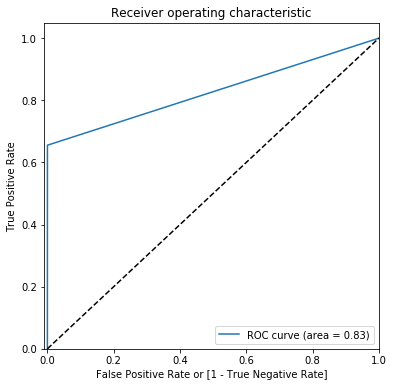

(array([0.00000000e+00, 1.52412216e-04, 1.00000000e+00]),
 array([0.        , 0.65540541, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [28]:
draw_roc(y_test, y_predicted_lrh)

### Model 2 - XGBoost with Data Imbalance

In [100]:
#Initializing Random forest and creating model
model_xgb = XGBClassifier()

In [101]:
# Fitting the model on Train data and Predicting on Test data
model_xgb.fit(X_train,y_train)
y_predicted_xg = model_xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [102]:
# Evaluation Metrices
print('Classification report:\n', classification_report(y_test, y_predicted_xg))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_xg))
print("XGBoost Accuracy with Imbalanced Data: ",accuracy_score(y_test,y_predicted_xg))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_xg))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.80      0.87       148

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85288     7]
 [   29   119]]
XGBoost Accuracy with Imbalanced Data:  0.9995786664794073
ROC AUC :  0.9019859929687585


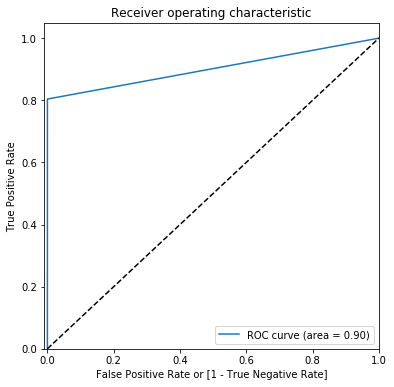

(array([0.00000000e+00, 8.20681165e-05, 1.00000000e+00]),
 array([0.        , 0.80405405, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [103]:
draw_roc(y_test, y_predicted_xg)

### Hyper Parameter Tuning - XGBoost with Data Imbalance

In [145]:
# Defining parameters
params = {
        'min_child_weight': [1, 5],
        'gamma': [1, 1.5, 2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [4, 5]
        }

In [148]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=5)
index_iterator = cross_val.split(X_train, y_train)


xgb_cross = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic', nthread=1) 


xgb_random = RandomizedSearchCV(estimator = xgb_cross, param_distributions = params, n_iter =10 , cv = cross_val,
                                verbose=0, random_state=99, scoring='roc_auc')

In [149]:
# Fitting the model on train data
xgb_random.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:18:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:19:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:22:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:23:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:24:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:25:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:26:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:31:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:41:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:48:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:49:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:55:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:56:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=True,
                                           validate_parameters=None,
                                   

In [150]:
# scores of RandomizedSearchCV
scores = xgb_random.cv_results_


In [151]:
print(xgb_random.best_score_)
print(xgb_random.best_params_)
print(xgb_random.best_index_)

0.9296282057015436
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.6}
5


In [104]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned = XGBClassifier(min_child_weight= 1,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [105]:
# Fitting the model on Train data and Predicting on Test data
model_xgb_tuned.fit(X_train,y_train)
y_predicted_xgh = model_xgb_tuned.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [106]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_xgh))
print('Classification report:\n', classification_report(y_test, y_predicted_xgh))
print("Hyperparameter Tuned XGBoost Accuracy with Imbalanced Data: ",accuracy_score(y_test,y_predicted_xgh))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_xgh))

Confusion matrix:
 [[85289     6]
 [   28   120]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.81      0.88       148

    accuracy                           1.00     85443
   macro avg       0.98      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Hyperparameter Tuned XGBoost Accuracy with Imbalanced Data:  0.999602073897218
ROC AUC :  0.9053702333554612


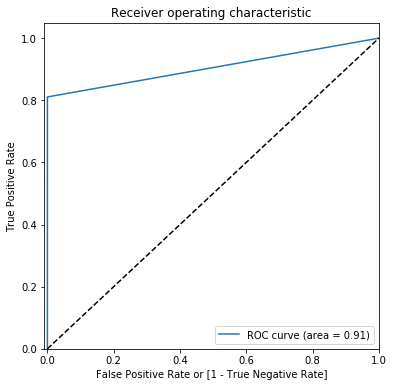

(array([0.00000000e+00, 7.03440999e-05, 1.00000000e+00]),
 array([0.        , 0.81081081, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [107]:
draw_roc(y_test, y_predicted_xgh)

### Model 3 - Random Forest with Imbalanced Data 

In [108]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, 
                             random_state=99,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [109]:
# Fitting the model on Train data and Predicting on Test data

rfc.fit(X_train,y_train)
y_predicted_rf = rfc.predict(X_test)

In [110]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_rf))
print('Classification report:\n', classification_report(y_test, y_predicted_rf))
print("Random Forest Classifier - Imbalanced Data Accuracy: ",accuracy_score(y_test,y_predicted_rf))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_rf))

Confusion matrix:
 [[85284    11]
 [   28   120]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.81      0.86       148

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest Classifier - Imbalanced Data Accuracy:  0.9995435553526912
ROC AUC :  0.905340923313841


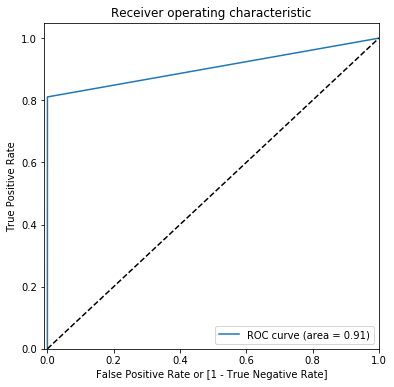

(array([0.00000000e+00, 1.28964183e-04, 1.00000000e+00]),
 array([0.        , 0.81081081, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [111]:
draw_roc(y_test, y_predicted_rf)

### Hyper Parameter Tuning - Random Forest with Data Imbalance


In [177]:
# Defining Parameters
params = { 
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5,6],
    'criterion' :['gini', 'entropy']
}

In [178]:
# Stratified K Fold
cross_val = StratifiedKFold(n_splits=3)
index_iterator = cross_val.split(X_train, y_train)
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = params, n_iter = 10, cv = cross_val,
                                verbose=2, random_state=99, scoring='roc_auc')

In [179]:
# Fitting the model on train data
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, max_features=auto, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=auto, max_depth=6, criterion=entropy, total= 2.5min
[CV] n_estimators=200, max_features=auto, max_depth=6, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV]  n_estimators=200, max_features=auto, max_depth=6, criterion=entropy, total= 2.6min
[CV] n_estimators=200, max_features=auto, max_depth=6, criterion=entropy 
[CV]  n_estimators=200, max_features=auto, max_depth=6, criterion=entropy, total= 2.5min
[CV] n_estimators=200, max_features=sqrt, max_depth=6, criterion=gini 
[CV]  n_estimators=200, max_features=sqrt, max_depth=6, criterion=gini, total= 1.8min
[CV] n_estimators=200, max_features=sqrt, max_depth=6, criterion=gini 
[CV]  n_estimators=200, max_features=sqrt, max_depth=6, criterion=gini, total= 1.8min
[CV] n_estimators=200, max_features=sqrt, max_depth=6, criterion=gini 
[CV]  n_estimators=200, max_features=sqrt, max_depth=6, criterion=gini, total= 1.8min
[CV] n_estimators=50, max_features=sqrt, max_depth=6, criterion=gini .
[CV]  n_estimators=50, max_features=sqrt, max_depth=6, criterion=gini, total=  26.8s
[CV] n_estimators=50, max_features=sqrt, max_depth=6, criterion=gini .
[CV]  n_estimators=50, max_features=sqrt, max_dept

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 37.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                     

In [180]:
print(clf_random.best_score_)
print(clf_random.best_params_)
print(clf_random.best_index_)

0.9739590597666169
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}
7


In [112]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=6,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=50, 
                               random_state=99)

In [113]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned.fit(X_train,y_train)
y_predicted_rfh = model_rfc_tuned.predict(X_test)

In [114]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_rfh))
print('Classification report:\n', classification_report(y_test, y_predicted_rfh))
print("Hyperparameter Tuned Random Forest Classifier - Imbalanced Data Accuracy: ",accuracy_score(y_test,y_predicted_rfh))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_rfh))

Confusion matrix:
 [[85266    29]
 [   25   123]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.83      0.82       148

    accuracy                           1.00     85443
   macro avg       0.90      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Hyperparameter Tuned Random Forest Classifier - Imbalanced Data Accuracy:  0.9993679997191109
ROC AUC :  0.915370542299143


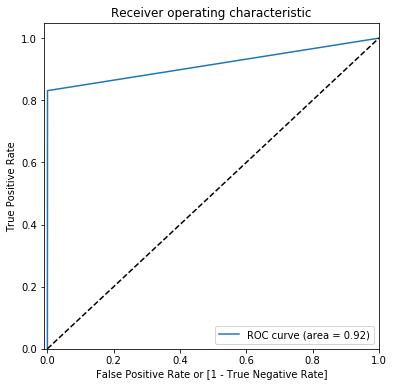

(array([0.00000000e+00, 3.39996483e-04, 1.00000000e+00]),
 array([0.        , 0.83108108, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [115]:
draw_roc(y_test, y_predicted_rfh)

## Balancing the Dataset

In [31]:
#We are using Smote and Adasyn for Balancing the dataset
smote = SMOTE(random_state=99)
adasyn = ADASYN(random_state=99)

In [33]:

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_adasyn, y_train_adasyn =adasyn.fit_resample(X_train,y_train)

## Model 4 -  Logistic Regression with SMOTE

In [116]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)

# Obtain model predictions
y_predicted_lrsmote = model_lr.predict(X_test)

In [117]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_lrsmote))
print('Classification report:\n', classification_report(y_test, y_predicted_lrsmote))
print("Logistic Regression with Smote Accuracy: ",accuracy_score(y_test,y_predicted_lrsmote))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_lrsmote))

Confusion matrix:
 [[82864  2431]
 [   11   137]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.93      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Logistic Regression with Smote Accuracy:  0.9714195428531301
ROC AUC :  0.9485872956020679


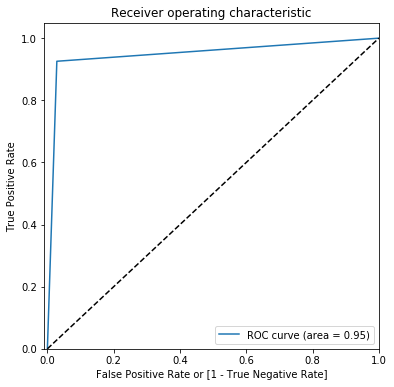

(array([0.        , 0.02850108, 1.        ]),
 array([0.        , 0.92567568, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [118]:
draw_roc(y_test, y_predicted_lrsmote)

### Hyperparameter Tuning of Logistic Regression with SMOTE 

In [40]:
# Passing the best parameteres
model_lrh_smote_tuned = LogisticRegression(penalty='l2',C=0.01,solver='liblinear')

In [42]:
# Predicting on test data

model_lrh_smote_tuned.fit(X_train_smote,y_train_smote)
y_predicted_smotelrh = model_lrh_smote_tuned.predict(X_test)

In [119]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_smotelrh))
print('Classification report:\n', classification_report(y_test, y_predicted_smotelrh))
print("Hyperparameter TunedLogistic Regression with Smote Accuracy: ",accuracy_score(y_test,y_predicted_smotelrh))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_smotelrh))

Confusion matrix:
 [[82936  2359]
 [   11   137]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.93      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Hyperparameter TunedLogistic Regression with Smote Accuracy:  0.9722622098943156
ROC AUC :  0.9490093602013996


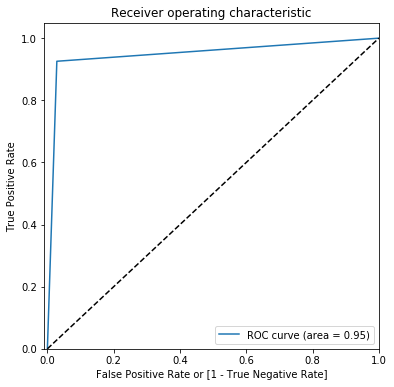

(array([0.        , 0.02850108, 1.        ]),
 array([0.        , 0.92567568, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [120]:
draw_roc(y_test, y_predicted)

## Model 5 - Logistic Regression with Adasyn

In [45]:
# Fit a logistic regression model to our data
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_adasyn, y_train_adasyn)

# Obtain model predictions
y_predicted_adasyn_lr = model_lr.predict(X_test)

In [121]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_adasyn_lr))
print('Classification report:\n', classification_report(y_test, y_predicted_adasyn_lr))
print("Logistic Regression with Adasyn Accuracy: ",accuracy_score(y_test,y_predicted_adasyn_lr))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_adasyn_lr))

Confusion matrix:
 [[77491  7804]
 [    5   143]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.97      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.94      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Logistic Regression with Adasyn Accuracy:  0.9086057371581054
ROC AUC :  0.9373609951472077


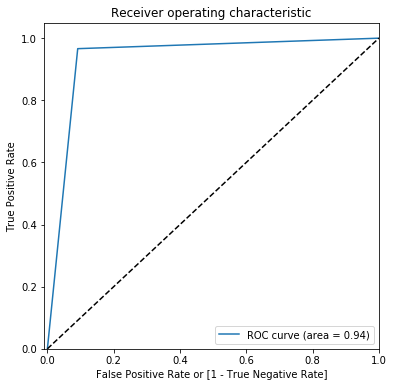

(array([0.        , 0.09149423, 1.        ]),
 array([0.        , 0.96621622, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [122]:
draw_roc(y_test, y_predicted_adasyn_lr)

### Hyperparameter Tuning of Logistic Regression with Adasyn 

In [48]:
# Passing the best parameteres
model_lrh_adasyn_tuned = LogisticRegression(penalty='l2',C=0.01,solver='liblinear')

In [49]:
# Predicting on test data

model_lrh_adasyn_tuned.fit(X_train_adasyn,y_train_adasyn)
y_predicted_adasynlrh = model_lrh_adasyn_tuned.predict(X_test)

In [123]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_adasynlrh))
print('Classification report:\n', classification_report(y_test, y_predicted_adasynlrh))
print("Hyperparameter Tuned Logistic Regression with Adasyn Accuracy: ",accuracy_score(y_test,y_predicted_adasynlrh))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_adasynlrh))

Confusion matrix:
 [[77535  7760]
 [    5   143]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.97      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.94      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Hyperparameter Tuned Logistic Regression with Adasyn Accuracy:  0.9091207003499409
ROC AUC :  0.937618923513466


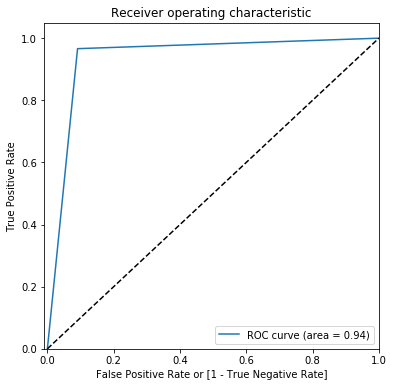

(array([0.        , 0.09097837, 1.        ]),
 array([0.        , 0.96621622, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [124]:
draw_roc(y_test, y_predicted_adasynlrh)

### Model 6 - XGBoost with SMOTE

In [52]:
model_xgb_smote = XGBClassifier()

In [53]:
#Fit the model on train data and predict the model on test data
model_xgb_smote.fit(X_train_smote,y_train_smote)
y_predicted_xgsmote = model_xgb_smote.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [125]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_xgsmote))
print('Classification report:\n', classification_report(y_test, y_predicted_xgsmote))
print("XGBoost with Smote Accuracy: ",accuracy_score(y_test,y_predicted_xgsmote))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_xgsmote))

Confusion matrix:
 [[85251    44]
 [   21   127]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.86      0.80       148

    accuracy                           1.00     85443
   macro avg       0.87      0.93      0.90     85443
weighted avg       1.00      1.00      1.00     85443

XGBoost with Smote Accuracy:  0.9992392589211521
ROC AUC :  0.9287961256877959


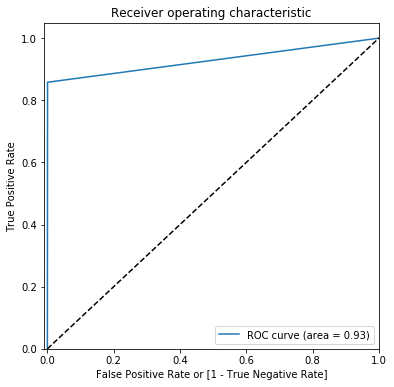

(array([0.00000000e+00, 5.15856733e-04, 1.00000000e+00]),
 array([0.        , 0.85810811, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [126]:
draw_roc(y_test, y_predicted_xgsmote)

### Hyperparameter Tuning of XGBoost with Smote

In [56]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned_smote = XGBClassifier(min_child_weight= 1,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [57]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted_xghsmote = model_xgb_tuned_smote.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [127]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_xghsmote))
print('Classification report:\n', classification_report(y_test, y_predicted_xghsmote))
print("Hyperparameter Tuned XGBoost with Smote Accuracy: ",accuracy_score(y_test,y_predicted_xghsmote))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_xghsmote))

Confusion matrix:
 [[85226    69]
 [   20   128]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.65      0.86      0.74       148

    accuracy                           1.00     85443
   macro avg       0.82      0.93      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Hyperparameter Tuned XGBoost with Smote Accuracy:  0.9989583699074237
ROC AUC :  0.9320279538580728


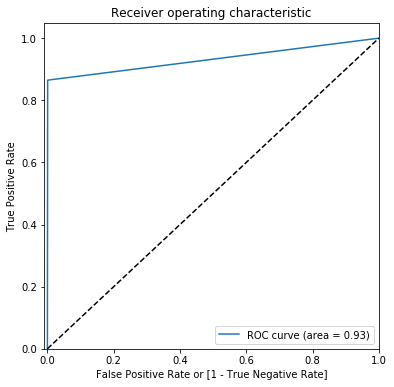

(array([0.00000000e+00, 8.08957149e-04, 1.00000000e+00]),
 array([0.        , 0.86486486, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [128]:
draw_roc(y_test, y_predicted_xghsmote)

### Model 7 - XGBoost with Adasyn

In [62]:
model_xgb_adasyn = XGBClassifier()

In [63]:
#Fit the model on train data and predict the model on test data
model_xgb_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted_xgadasyn = model_xgb_adasyn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_xgadasyn))
print('Classification report:\n', classification_report(y_test, y_predicted_xgadasyn))
print("XGBoost with Adasyn Accuracy: ",accuracy_score(y_test,y_predicted_xgadasyn))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_xgadasyn))

Confusion matrix:
 [[85230    65]
 [   21   127]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.66      0.86      0.75       148

    accuracy                           1.00     85443
   macro avg       0.83      0.93      0.87     85443
weighted avg       1.00      1.00      1.00     85443

XGBoost with Adasyn Accuracy:  0.9989934810341398
ROC AUC :  0.9286730235129906


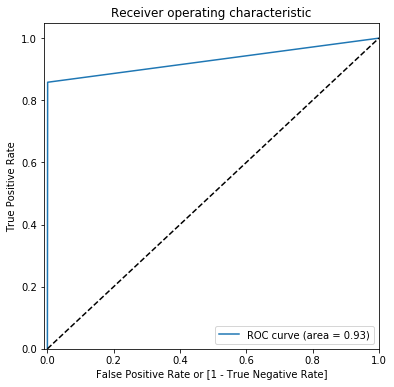

(array([0.00000000e+00, 7.62061082e-04, 1.00000000e+00]),
 array([0.        , 0.85810811, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [131]:
draw_roc(y_test, y_predicted_xgadasyn)

### Hyperparameter Tuning of XGBoost with Adasyn

In [66]:
# Passing the best parameteres based on Randomized Search CV
model_xgb_tuned_adasyn = XGBClassifier(min_child_weight= 1,
        gamma= 1.5,
        subsample= 1.0,
        colsample_bytree= 0.6,
        max_depth= 5)

In [67]:
#Fit the model on train data and predict the model on test data
model_xgb_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted_xghadasyn = model_xgb_tuned_adasyn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [132]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_xghadasyn))
print('Classification report:\n', classification_report(y_test, y_predicted_xghadasyn))
print("Hyperparameter Tuned XGBoost with Adasyn Accuracy: ",accuracy_score(y_test,y_predicted_xghadasyn))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_xghadasyn))

Confusion matrix:
 [[85191   104]
 [   22   126]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.55      0.85      0.67       148

    accuracy                           1.00     85443
   macro avg       0.77      0.93      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Hyperparameter Tuned XGBoost with Adasyn Accuracy:  0.9985253326779256
ROC AUC :  0.9250660268099744


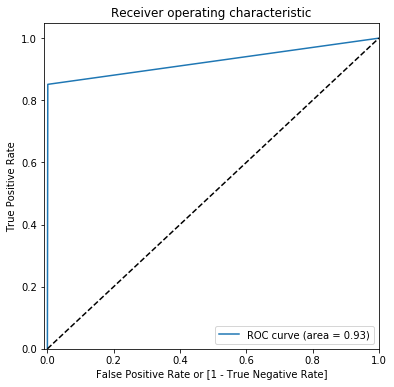

(array([0.       , 0.0012193, 1.       ]),
 array([0.        , 0.85135135, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [133]:
draw_roc(y_test, y_predicted_xghadasyn)

### Model 8 - Random Forest with SMOTE

In [70]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
rfc_smote = RandomForestClassifier(n_jobs=-1, 
                             random_state=99,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [71]:
# Fitting the model on Train data and Predicting on Test data

rfc_smote.fit(X_train_smote,y_train_smote)
y_predicted_rfcsmote = rfc_smote.predict(X_test)

In [134]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_rfcsmote))
print('Classification report:\n', classification_report(y_test, y_predicted_rfcsmote))
print("Random Forest Accuracy with Smote: ",accuracy_score(y_test,y_predicted_rfcsmote))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_rfcsmote))

Confusion matrix:
 [[85274    21]
 [   26   122]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.82      0.84       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest Accuracy with Smote:  0.9994499256814484
ROC AUC :  0.912039059987357


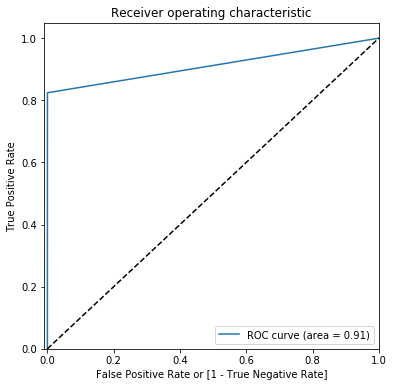

(array([0.0000000e+00, 2.4620435e-04, 1.0000000e+00]),
 array([0.        , 0.82432432, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [135]:
draw_roc(y_test, y_predicted_rfcsmote)

### Hyperparameter Tuning of Random Forest with Smote

In [74]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned_smote = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=6,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=50, 
                               random_state=99)

In [75]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned_smote.fit(X_train_smote,y_train_smote)
y_predicted_rfchsmote = model_rfc_tuned_smote.predict(X_test)

In [136]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_rfchsmote))
print('Classification report:\n', classification_report(y_test, y_predicted_rfchsmote))
print("Hyperparameter Tuned Random Forest Smote Accuracy: ",accuracy_score(y_test,y_predicted_rfchsmote))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_rfchsmote))

Confusion matrix:
 [[73402 11893]
 [    6   142]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     85295
           1       0.01      0.96      0.02       148

    accuracy                           0.86     85443
   macro avg       0.51      0.91      0.47     85443
weighted avg       1.00      0.86      0.92     85443

Hyperparameter Tuned Random Forest Smote Accuracy:  0.8607375677352153
ROC AUC :  0.9100128647317816


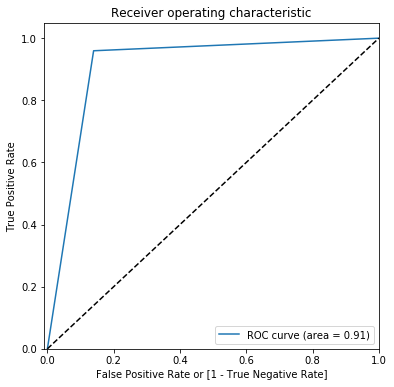

(array([0.        , 0.13943373, 1.        ]),
 array([0.        , 0.95945946, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [137]:
draw_roc(y_test, y_predicted_rfchsmote)

### Model 9 - Random Forest with Adasyn

In [78]:
#Initializing Random forest and creating model

from sklearn.ensemble import RandomForestClassifier
rfc_adasyn = RandomForestClassifier(n_jobs=-1, 
                             random_state=99,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [79]:
# Fitting the model on Train data and Predicting on Test data

rfc_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted_rfcadasyn = rfc_adasyn.predict(X_test)

In [138]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_rfcadasyn))
print('Classification report:\n', classification_report(y_test, y_predicted_rfcadasyn))
print("Random Forest with Adasyn Accuracy: ",accuracy_score(y_test,y_predicted_rfcadasyn))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_rfcadasyn))

Confusion matrix:
 [[85277    18]
 [   26   122]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.82      0.85       148

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest with Adasyn Accuracy:  0.9994850368081645
ROC AUC :  0.9120566460123292


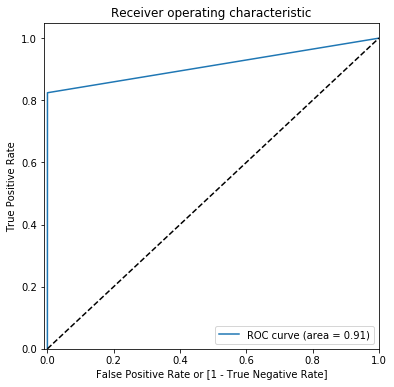

(array([0.000000e+00, 2.110323e-04, 1.000000e+00]),
 array([0.        , 0.82432432, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [139]:
draw_roc(y_test, y_predicted_rfcadasyn)

### Hyperparameter Tuning of Random Forest with Adasyn

In [82]:
# Passing the best parameteres based on Randomized Search CV
model_rfc_tuned_adasyn = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=6,
                               max_features='sqrt',
                               min_samples_leaf=10,
                               n_estimators=50, 
                               random_state=99)

In [83]:
# Fitting the model on Train data and Predicting on Test Data

model_rfc_tuned_adasyn.fit(X_train_adasyn,y_train_adasyn)
y_predicted_rfchadasyn = model_rfc_tuned_adasyn.predict(X_test)

In [140]:
# Evaluation Metrics

print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted_rfchadasyn))
print('Classification report:\n', classification_report(y_test, y_predicted_rfchadasyn))
print("Random Forest with Adasyn Accuracy: ",accuracy_score(y_test,y_predicted_rfchadasyn))
print('ROC AUC : ', roc_auc_score(y_test, y_predicted_rfchadasyn))

Confusion matrix:
 [[54942 30353]
 [    3   145]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78     85295
           1       0.00      0.98      0.01       148

    accuracy                           0.64     85443
   macro avg       0.50      0.81      0.40     85443
weighted avg       1.00      0.64      0.78     85443

Random Forest with Adasyn Accuracy:  0.6447222124691314
ROC AUC :  0.81193532620492


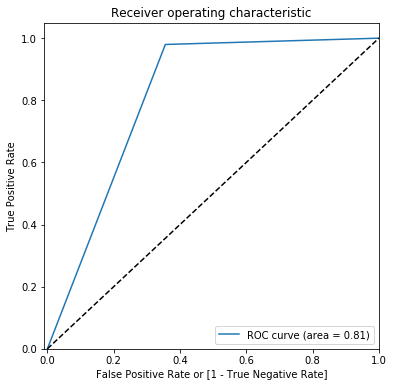

(array([0.        , 0.35585908, 1.        ]),
 array([0.        , 0.97972973, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [141]:
draw_roc(y_test, y_predicted_rfchadasyn)

## Conclusion

Finally we have come to Model Selection. As we know since ROC AUCis going to be our top parameter followed by Recall and Accuracy. This is because we need to detect Class 1 with more accuracy, as the dataset is imbalanced even if all the Class 0 is detected the accuracy will be more than 99% but that will be of no use to us.

Two models seems to stand out in performance:
1. Hyperparameter Tuned XGBoost with Smote has ROC AUC = 93.2%; Recall = 100%; Accuracy - 99.8%
2. Hyperparameter Tuned Logistic Regression with Smote has ROC AUC = 94.9%; Recall = 97%; Accuracy - 97.2%

From this we will choose Hyperparameter Tuned XGBoost with Smote since It has very good accuracy, ROC AUC but also importantly it  has better Recall than the other model.

From Below Bar plot we can see that the Feature V14 explains almost 47 to 50% of the Target class followed by V10 and V4 at around 9% each.

In [153]:

feat = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']

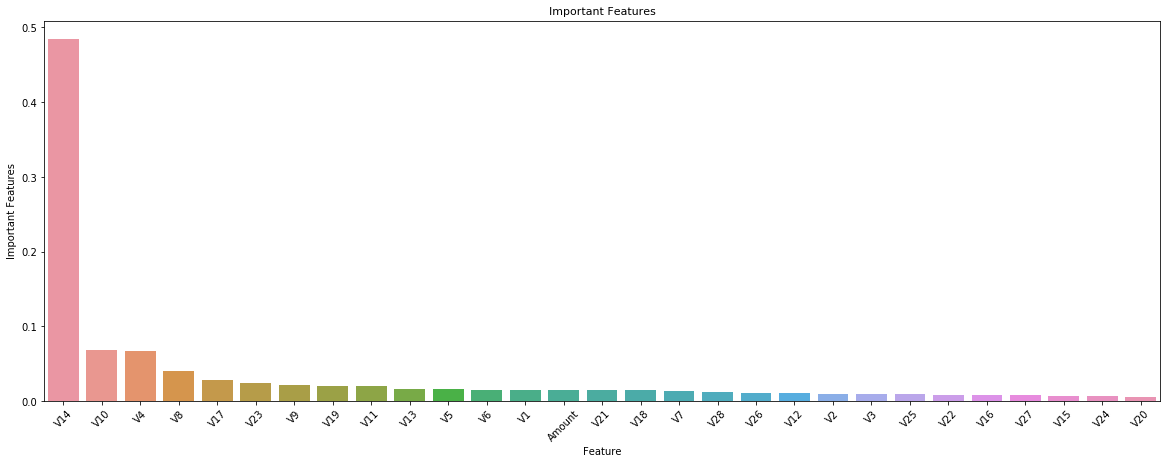

In [154]:
impfeat = pd.DataFrame({'Feature': feat, 'Important Features': model_xgb_tuned_smote.feature_importances_})
impfeat = impfeat.sort_values(by='Important Features',ascending=False)
plt.figure(figsize = (20,7))
plt.title('Important Features',fontsize=11)
s = sns.barplot(x='Feature',y='Important Features',data=impfeat)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()  

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_predicted_xghsmote,
                                              drop_intermediate = False )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

1
